In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Libraries imported successfully!")

Libraries imported successfully!


# Comprehensive Customer Churn Analysis

This notebook provides an in-depth analysis of the Telco Customer Churn dataset to uncover patterns, insights, and factors contributing to customer churn.

## Table of Contents
1. Data Loading and Initial Exploration
2. Data Cleaning and Preprocessing
3. Univariate Analysis
4. Churn Analysis
5. Bivariate Analysis
6. Customer Segmentation
7. Key Insights and Recommendations

#  EDA (Exploratory Data Analysis)

## 1. Data Loading and Initial Exploration

In [2]:
# Load the dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

print("Dataset Shape:", df.shape)
print("\n" + "="*80)
print("First 5 rows:")
df.head()

Dataset Shape: (7043, 21)

First 5 rows:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Dataset Information
print("Dataset Information:")
print("="*80)
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  704

In [4]:
# Statistical Summary
print("Statistical Summary of Numerical Features:")
print("="*80)
df.describe()

Statistical Summary of Numerical Features:


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
# print total charges info
print("Total Charges Info:")
print("="*80)
print(df['TotalCharges'].describe())


Total Charges Info:
count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object


In [6]:
# Check for missing values
print("Missing Values:")
print("="*80)
missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing_values,
    'Percentage': missing_percent
})
print(missing_df[missing_df['Missing_Count'] > 0])

# Check for duplicates
print("\n" + "="*80)
print(f"Duplicate rows: {df.duplicated().sum()}")

Missing Values:
Empty DataFrame
Columns: [Missing_Count, Percentage]
Index: []

Duplicate rows: 0


## 2. Data Cleaning and Preprocessing

In [7]:
# Convert TotalCharges to numeric (handle spaces)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill missing TotalCharges with 0 (new customers)
df['TotalCharges'].fillna(0, inplace=True)

# Convert SeniorCitizen to categorical
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

# Create a copy for analysis
df_clean = df.copy()

print("Data cleaning completed!")
print(f"Final dataset shape: {df_clean.shape}")
print(f"Remaining missing values: {df_clean.isnull().sum().sum()}")

Data cleaning completed!


Final dataset shape: (7043, 21)
Remaining missing values: 0


## 3. Univariate Analysis

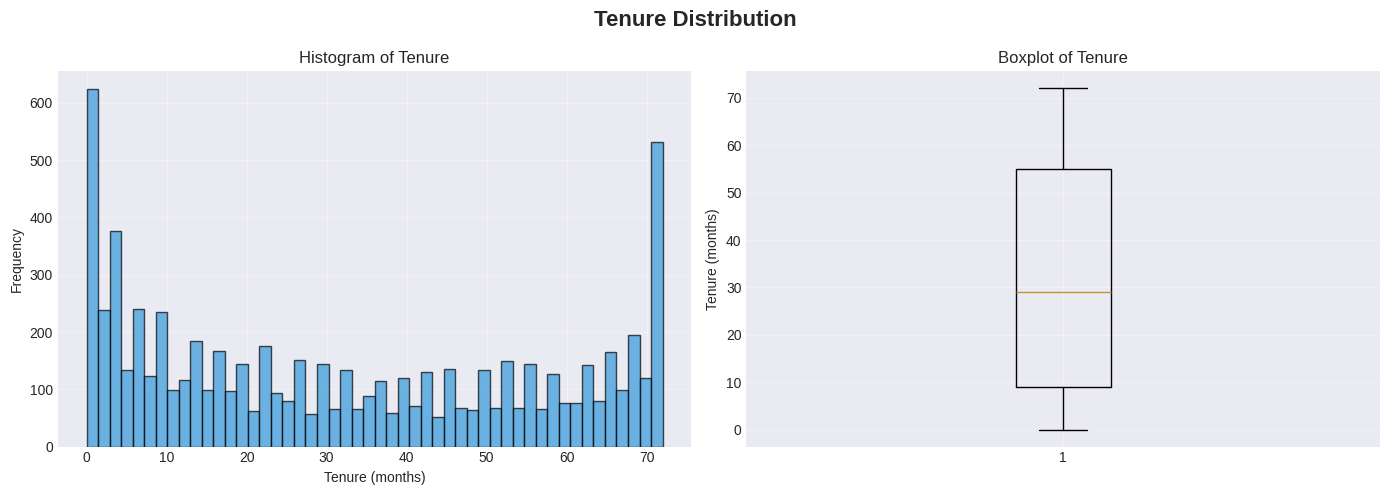


Tenure Statistics:
  Mean: 32.37 months
  Median: 29.00 months
  Std Dev: 24.56
  Min: 0.00 months
  Max: 72.00 months


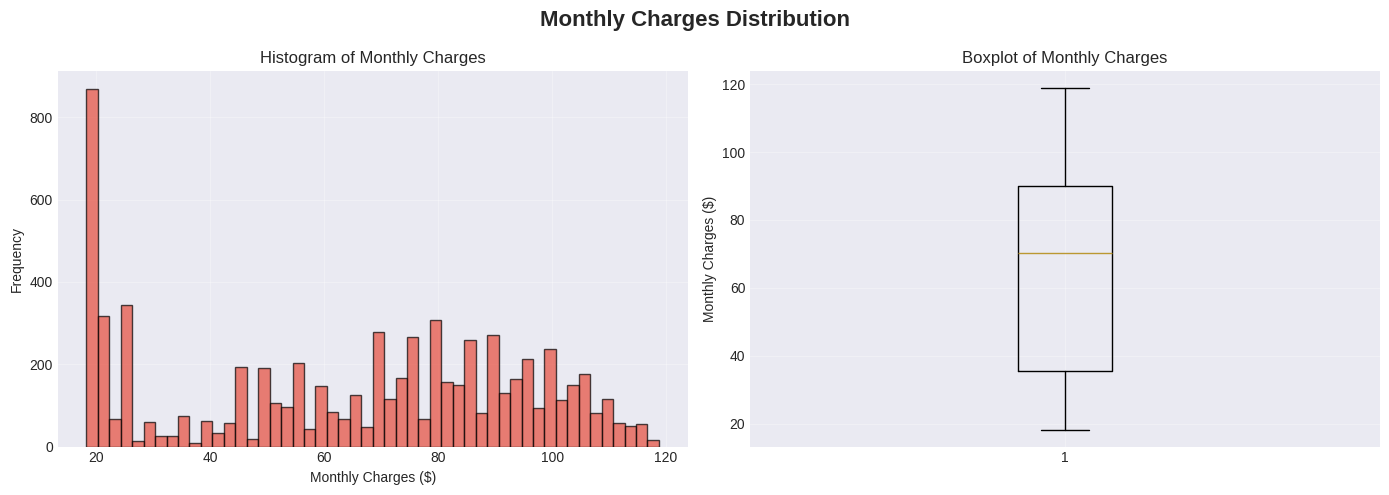


Monthly Charges Statistics:
  Mean: $64.76
  Median: $70.35
  Std Dev: $30.09
  Min: $18.25
  Max: $118.75


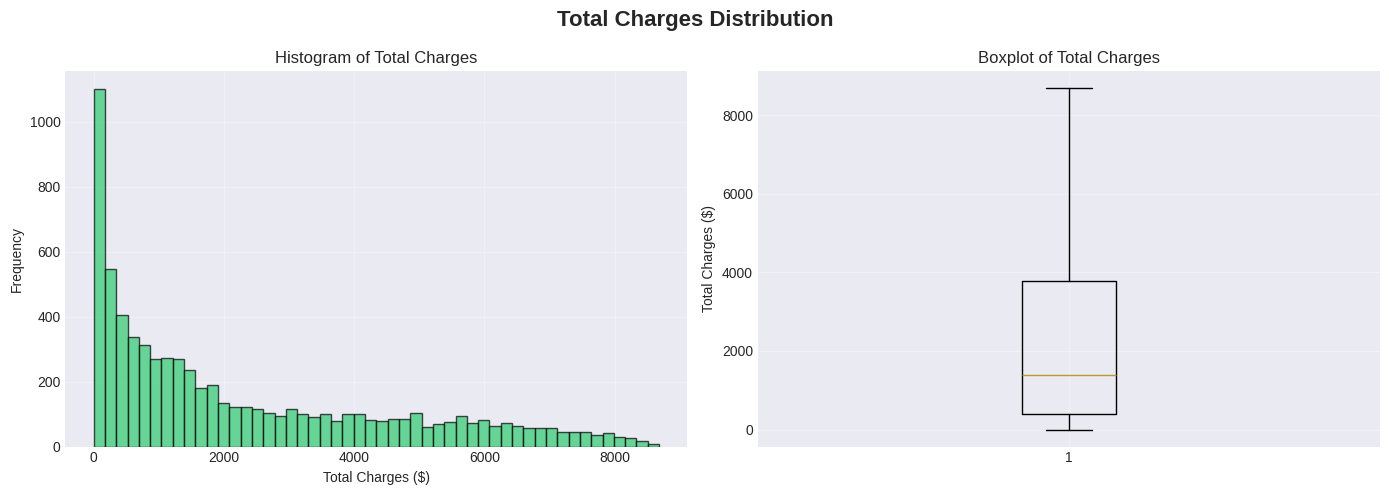


Total Charges Statistics:
  Mean: $2279.73
  Median: $1394.55
  Std Dev: $2266.79
  Min: $0.00
  Max: $8684.80


In [8]:
# Distribution of Numerical Features
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# 1. Tenure Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Tenure Distribution', fontsize=16, fontweight='bold')

# Histogram
axes[0].hist(df_clean['tenure'], bins=50, edgecolor='black', alpha=0.7, color='#3498db')
axes[0].set_title('Histogram of Tenure')
axes[0].set_xlabel('Tenure (months)')
axes[0].set_ylabel('Frequency')
axes[0].grid(alpha=0.3)

# Boxplot
axes[1].boxplot(df_clean['tenure'], vert=True)
axes[1].set_title('Boxplot of Tenure')
axes[1].set_ylabel('Tenure (months)')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\nTenure Statistics:")
print(f"  Mean: {df_clean['tenure'].mean():.2f} months")
print(f"  Median: {df_clean['tenure'].median():.2f} months")
print(f"  Std Dev: {df_clean['tenure'].std():.2f}")
print(f"  Min: {df_clean['tenure'].min():.2f} months")
print(f"  Max: {df_clean['tenure'].max():.2f} months")

# 2. Monthly Charges Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Monthly Charges Distribution', fontsize=16, fontweight='bold')

# Histogram
axes[0].hist(df_clean['MonthlyCharges'], bins=50, edgecolor='black', alpha=0.7, color='#e74c3c')
axes[0].set_title('Histogram of Monthly Charges')
axes[0].set_xlabel('Monthly Charges ($)')
axes[0].set_ylabel('Frequency')
axes[0].grid(alpha=0.3)

# Boxplot
axes[1].boxplot(df_clean['MonthlyCharges'], vert=True)
axes[1].set_title('Boxplot of Monthly Charges')
axes[1].set_ylabel('Monthly Charges ($)')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\nMonthly Charges Statistics:")
print(f"  Mean: ${df_clean['MonthlyCharges'].mean():.2f}")
print(f"  Median: ${df_clean['MonthlyCharges'].median():.2f}")
print(f"  Std Dev: ${df_clean['MonthlyCharges'].std():.2f}")
print(f"  Min: ${df_clean['MonthlyCharges'].min():.2f}")
print(f"  Max: ${df_clean['MonthlyCharges'].max():.2f}")

# 3. Total Charges Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Total Charges Distribution', fontsize=16, fontweight='bold')

# Histogram
axes[0].hist(df_clean['TotalCharges'], bins=50, edgecolor='black', alpha=0.7, color='#2ecc71')
axes[0].set_title('Histogram of Total Charges')
axes[0].set_xlabel('Total Charges ($)')
axes[0].set_ylabel('Frequency')
axes[0].grid(alpha=0.3)

# Boxplot
axes[1].boxplot(df_clean['TotalCharges'], vert=True)
axes[1].set_title('Boxplot of Total Charges')
axes[1].set_ylabel('Total Charges ($)')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\nTotal Charges Statistics:")
print(f"  Mean: ${df_clean['TotalCharges'].mean():.2f}")
print(f"  Median: ${df_clean['TotalCharges'].median():.2f}")
print(f"  Std Dev: ${df_clean['TotalCharges'].std():.2f}")
print(f"  Min: ${df_clean['TotalCharges'].min():.2f}")
print(f"  Max: ${df_clean['TotalCharges'].max():.2f}")

Total Categorical Features to visualize: 16



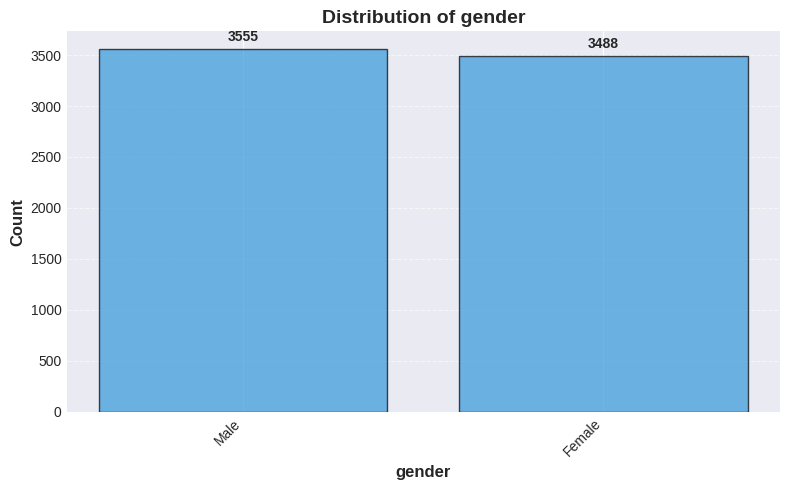


gender Value Counts:
  Male: 3555 (50.5%)
  Female: 3488 (49.5%)
--------------------------------------------------


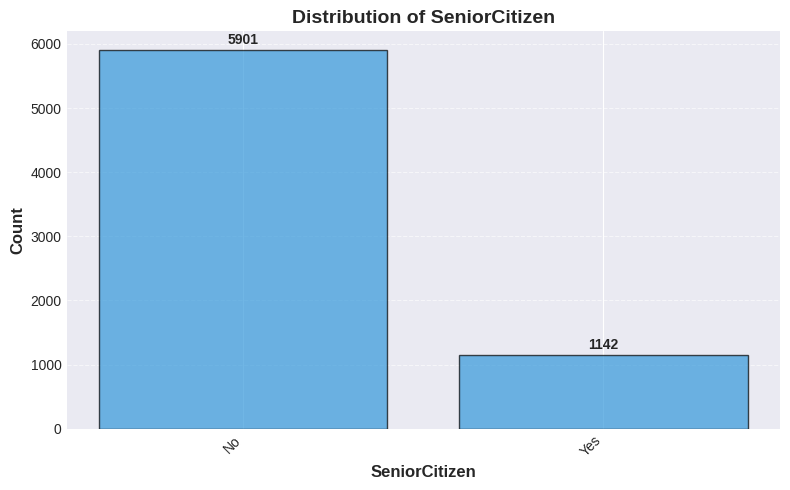


SeniorCitizen Value Counts:
  No: 5901 (83.8%)
  Yes: 1142 (16.2%)
--------------------------------------------------


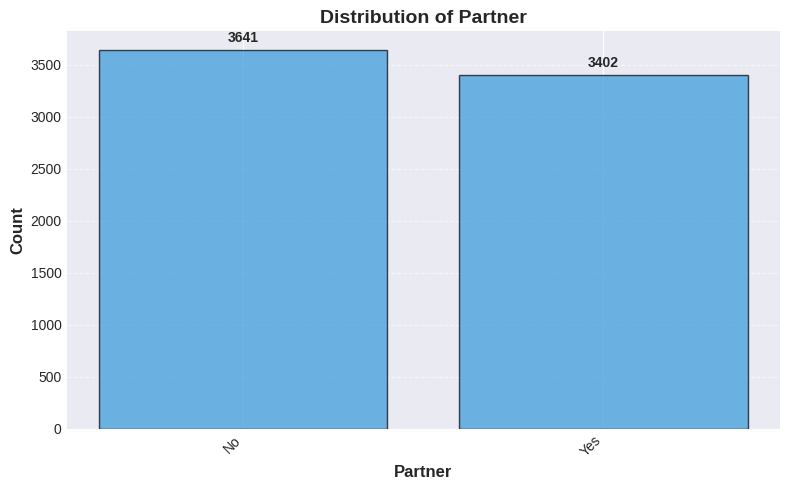


Partner Value Counts:
  No: 3641 (51.7%)
  Yes: 3402 (48.3%)
--------------------------------------------------


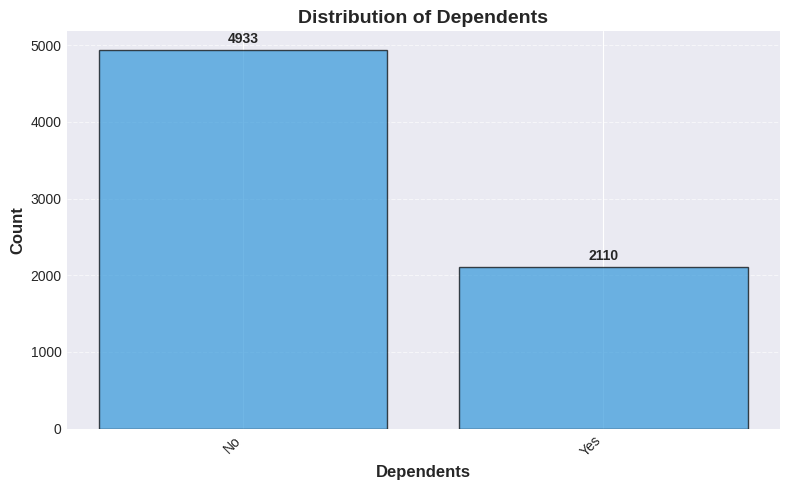


Dependents Value Counts:
  No: 4933 (70.0%)
  Yes: 2110 (30.0%)
--------------------------------------------------


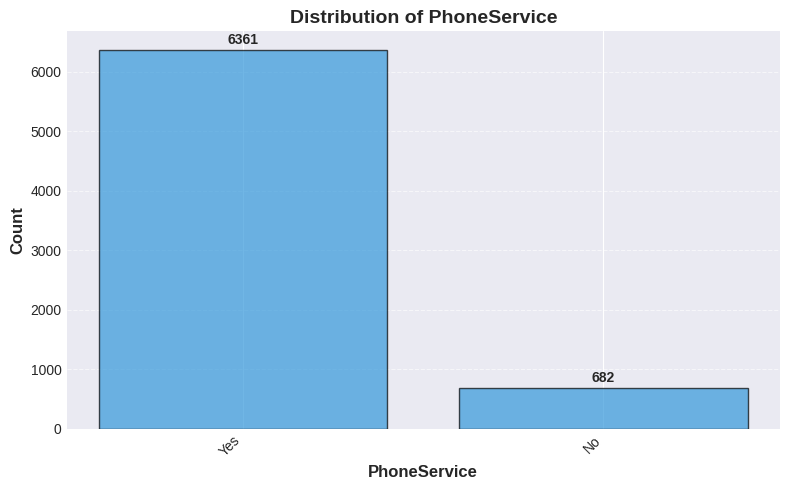


PhoneService Value Counts:
  Yes: 6361 (90.3%)
  No: 682 (9.7%)
--------------------------------------------------


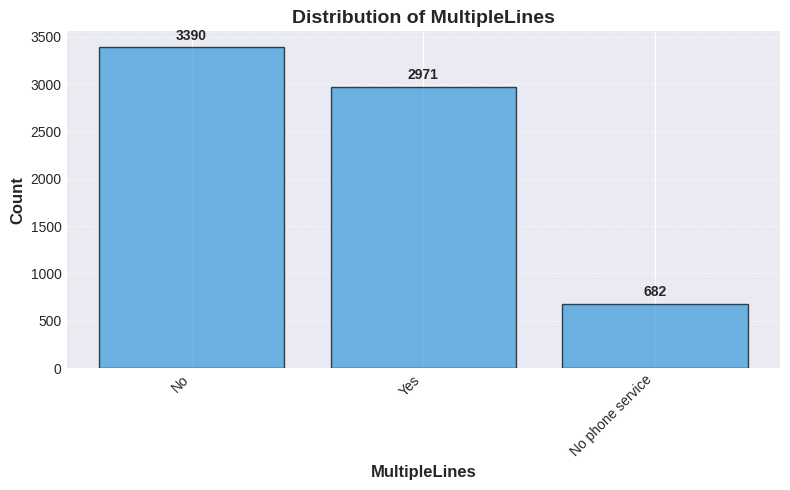


MultipleLines Value Counts:
  No: 3390 (48.1%)
  Yes: 2971 (42.2%)
  No phone service: 682 (9.7%)
--------------------------------------------------


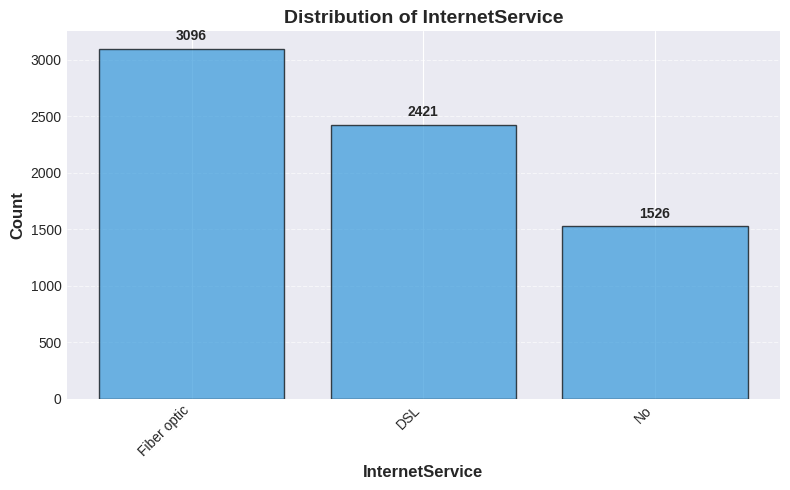


InternetService Value Counts:
  Fiber optic: 3096 (44.0%)
  DSL: 2421 (34.4%)
  No: 1526 (21.7%)
--------------------------------------------------


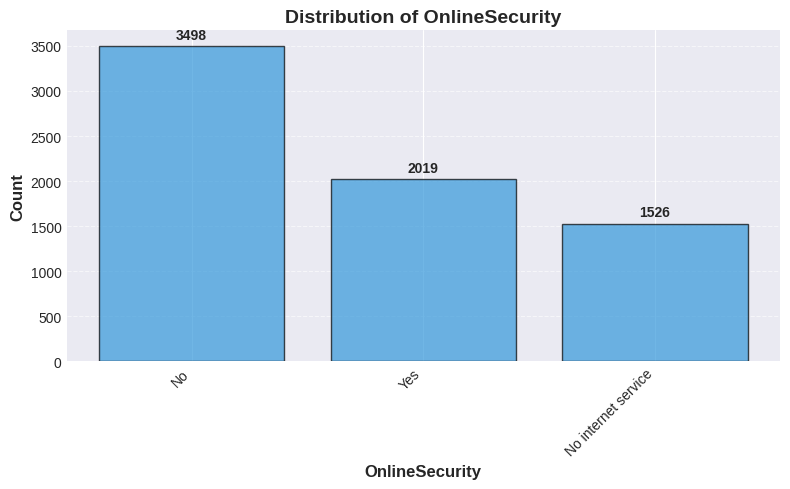


OnlineSecurity Value Counts:
  No: 3498 (49.7%)
  Yes: 2019 (28.7%)
  No internet service: 1526 (21.7%)
--------------------------------------------------


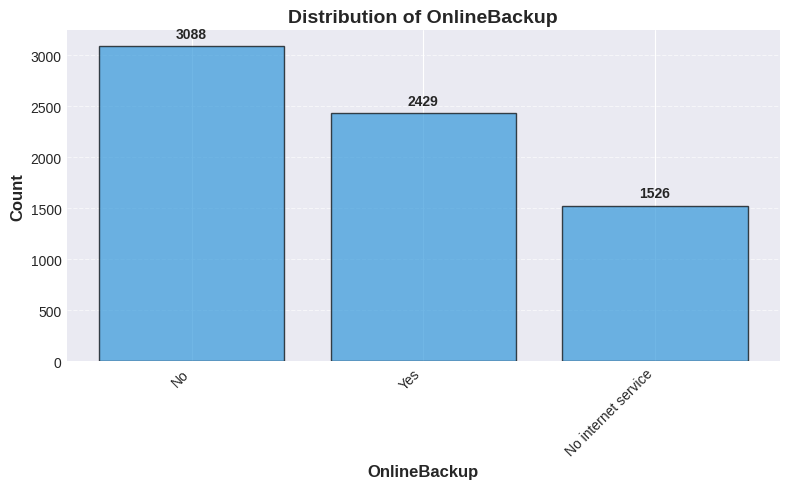


OnlineBackup Value Counts:
  No: 3088 (43.8%)
  Yes: 2429 (34.5%)
  No internet service: 1526 (21.7%)
--------------------------------------------------


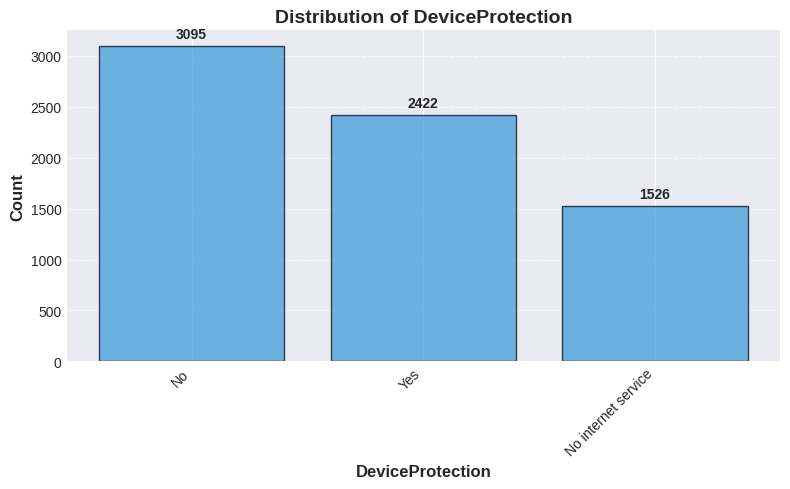


DeviceProtection Value Counts:
  No: 3095 (43.9%)
  Yes: 2422 (34.4%)
  No internet service: 1526 (21.7%)
--------------------------------------------------


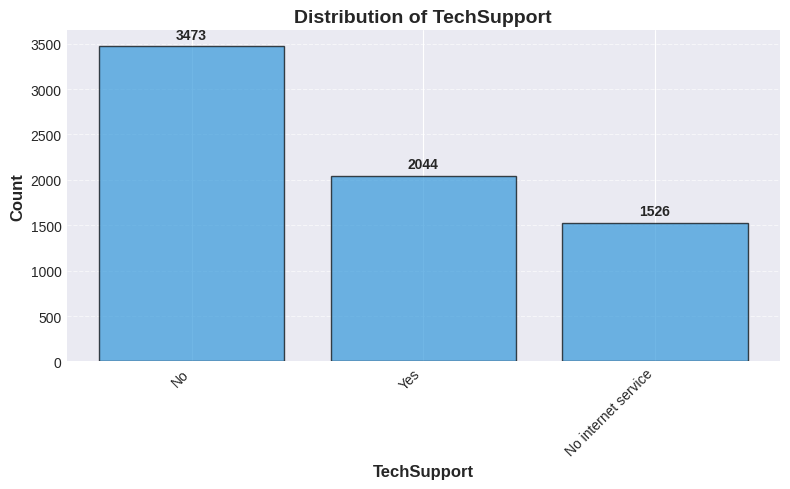


TechSupport Value Counts:
  No: 3473 (49.3%)
  Yes: 2044 (29.0%)
  No internet service: 1526 (21.7%)
--------------------------------------------------


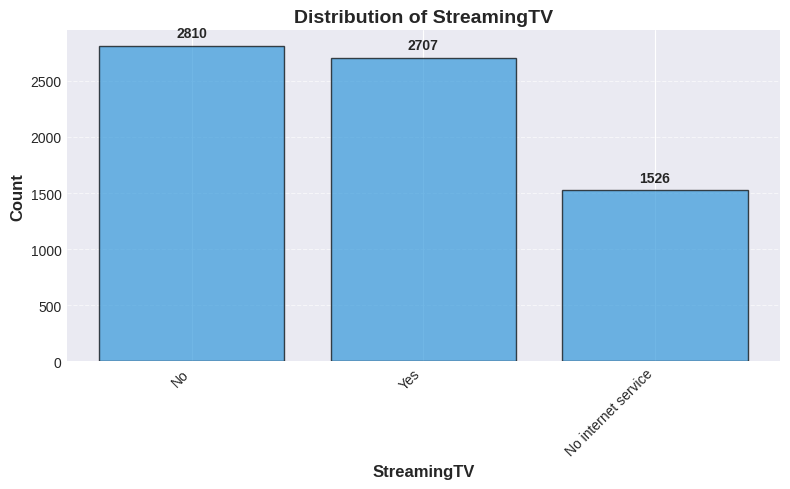


StreamingTV Value Counts:
  No: 2810 (39.9%)
  Yes: 2707 (38.4%)
  No internet service: 1526 (21.7%)
--------------------------------------------------


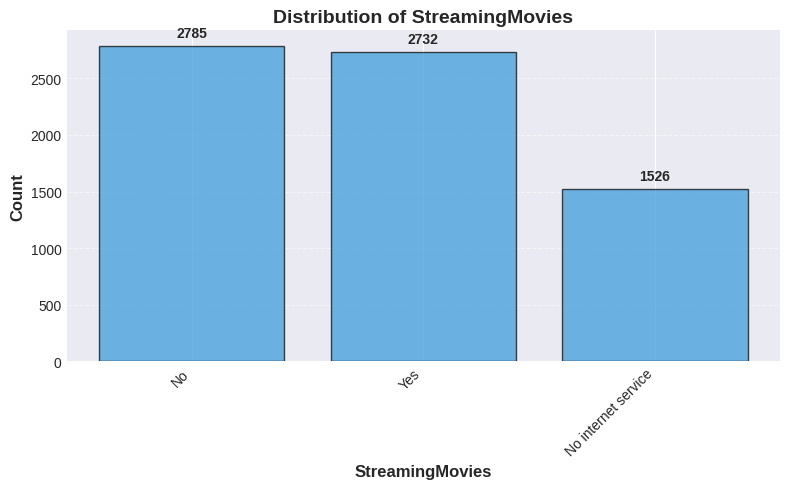


StreamingMovies Value Counts:
  No: 2785 (39.5%)
  Yes: 2732 (38.8%)
  No internet service: 1526 (21.7%)
--------------------------------------------------


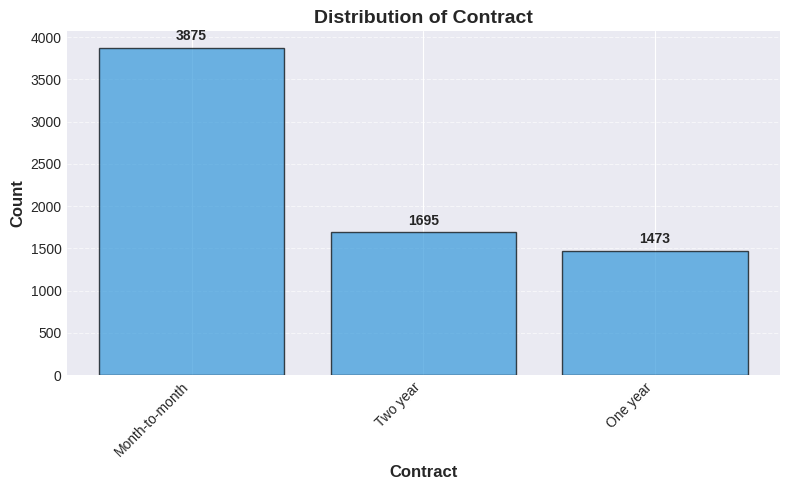


Contract Value Counts:
  Month-to-month: 3875 (55.0%)
  Two year: 1695 (24.1%)
  One year: 1473 (20.9%)
--------------------------------------------------


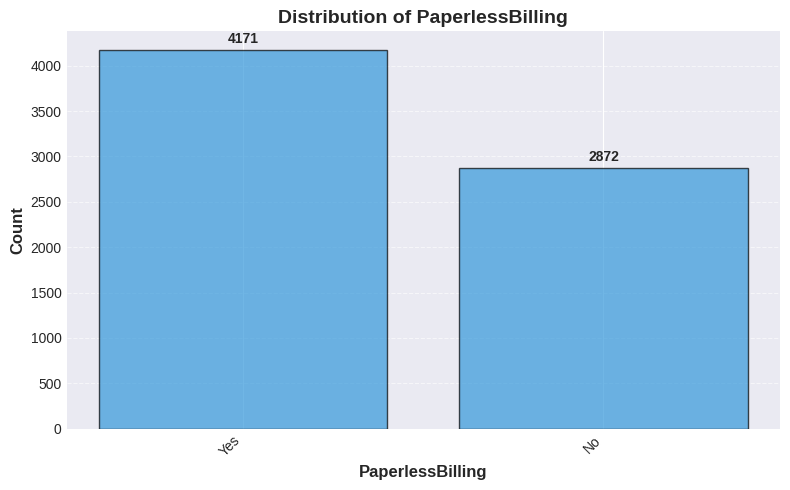


PaperlessBilling Value Counts:
  Yes: 4171 (59.2%)
  No: 2872 (40.8%)
--------------------------------------------------


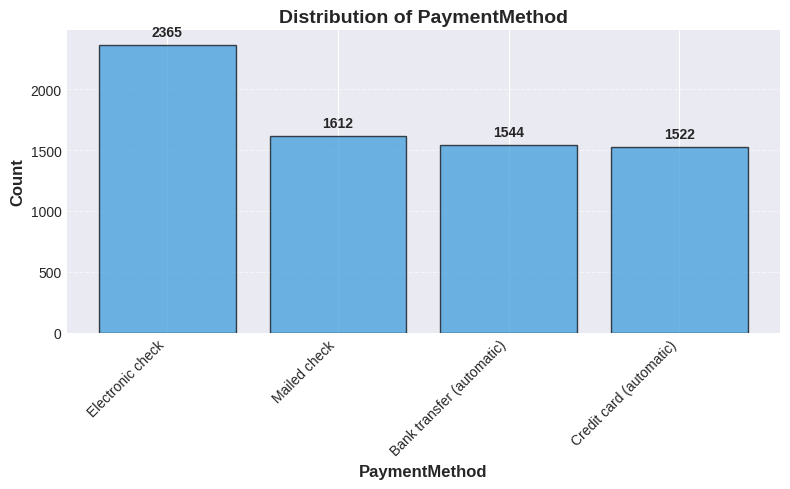


PaymentMethod Value Counts:
  Electronic check: 2365 (33.6%)
  Mailed check: 1612 (22.9%)
  Bank transfer (automatic): 1544 (21.9%)
  Credit card (automatic): 1522 (21.6%)
--------------------------------------------------

✅ All 16 categorical features visualized!


In [9]:
import matplotlib.pyplot as plt

# Distribution of ALL Categorical Features
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
                   'PhoneService', 'MultipleLines', 'InternetService',
                   'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                   'TechSupport', 'StreamingTV', 'StreamingMovies',
                   'Contract', 'PaperlessBilling', 'PaymentMethod']

print(f"Total Categorical Features to visualize: {len(categorical_cols)}\n")

for col in categorical_cols:
    # Create a new figure for each plot
    plt.figure(figsize=(8, 5)) 
    
    counts = df_clean[col].value_counts()
    
    # Use plt.bar() for the single plot with color coding
    bars = plt.bar(counts.index, counts.values, edgecolor='black', alpha=0.7, color='#3498db')
    
    plt.title(f'Distribution of {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12, fontweight='bold')
    plt.ylabel('Count', fontsize=12, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    
    # Add count labels on bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 50, int(yval), 
                ha='center', va='bottom', fontweight='bold', fontsize=10)

    # Display the plot before the loop continues to the next variable
    plt.tight_layout()
    plt.show()
    
    # Print value counts for reference
    print(f"\n{col} Value Counts:")
    for val, count in counts.items():
        percentage = (count / len(df_clean)) * 100
        print(f"  {val}: {count} ({percentage:.1f}%)")
    print("-" * 50)

print(f"\n✅ All {len(categorical_cols)} categorical features visualized!")

## 4. Churn Analysis

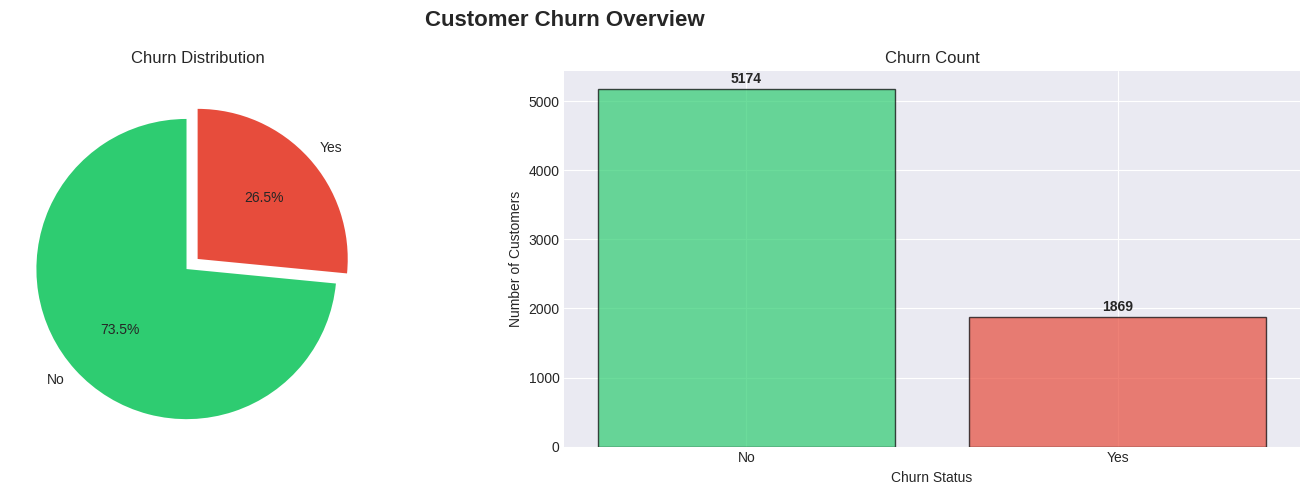


Overall Churn Rate: 26.54%
Churned Customers: 1869
Retained Customers: 5174


In [10]:
# Overall Churn Rate
churn_counts = df_clean['Churn'].value_counts()
churn_rate = (churn_counts['Yes'] / len(df_clean)) * 100

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Customer Churn Overview', fontsize=16, fontweight='bold')

# Pie chart
colors = ['#2ecc71', '#e74c3c']
axes[0].pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%', 
            colors=colors, startangle=90, explode=(0.1, 0))
axes[0].set_title('Churn Distribution')

# Bar chart
axes[1].bar(churn_counts.index, churn_counts.values, color=colors, edgecolor='black', alpha=0.7)
axes[1].set_title('Churn Count')
axes[1].set_xlabel('Churn Status')
axes[1].set_ylabel('Number of Customers')
for i, v in enumerate(churn_counts.values):
    axes[1].text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n{'='*80}")
print(f"Overall Churn Rate: {churn_rate:.2f}%")
print(f"Churned Customers: {churn_counts['Yes']}")
print(f"Retained Customers: {churn_counts['No']}")
print(f"{'='*80}")

## 5. Bivariate Analysis - Churn vs Features

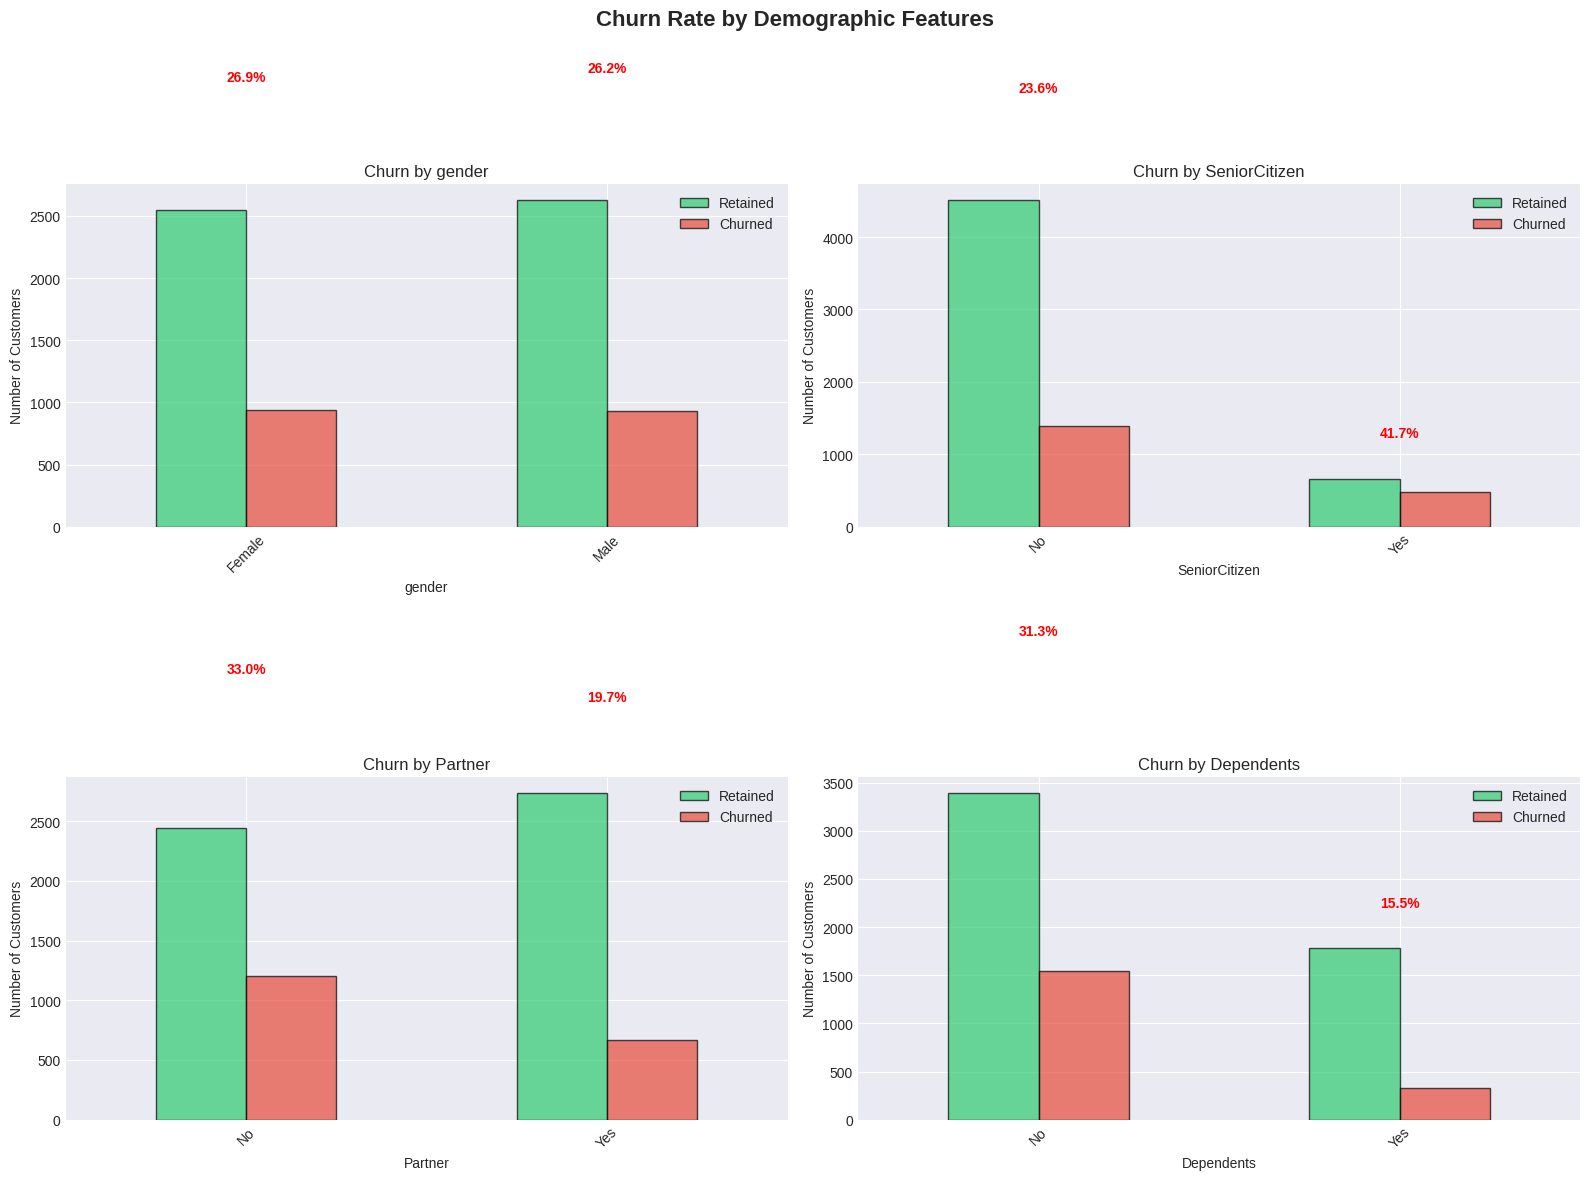


Churn Rate by Demographics:

gender:
Churn          No        Yes
gender                      
Female  73.079128  26.920872
Male    73.839662  26.160338

SeniorCitizen:
Churn                 No        Yes
SeniorCitizen                      
No             76.393832  23.606168
Yes            58.318739  41.681261

Partner:
Churn           No        Yes
Partner                      
No       67.042021  32.957979
Yes      80.335097  19.664903

Dependents:
Churn              No        Yes
Dependents                      
No          68.720860  31.279140
Yes         84.549763  15.450237


In [11]:
# Churn by Demographics
demographic_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Churn Rate by Demographic Features', fontsize=16, fontweight='bold')

for idx, feature in enumerate(demographic_features):
    row = idx // 2
    col = idx % 2
    
    # Calculate churn rate
    churn_data = df_clean.groupby([feature, 'Churn']).size().unstack(fill_value=0)
    churn_rate = (churn_data['Yes'] / (churn_data['Yes'] + churn_data['No'])) * 100
    
    # Create grouped bar chart
    churn_data.plot(kind='bar', ax=axes[row, col], color=['#2ecc71', '#e74c3c'], 
                     edgecolor='black', alpha=0.7)
    axes[row, col].set_title(f'Churn by {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Number of Customers')
    axes[row, col].legend(['Retained', 'Churned'])
    axes[row, col].tick_params(axis='x', rotation=45)
    
    # Add churn rate as text
    for i, (idx_val, rate) in enumerate(churn_rate.items()):
        axes[row, col].text(i, churn_data.loc[idx_val].sum() + 100, 
                           f'{rate:.1f}%', ha='center', fontweight='bold', color='red')

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\nChurn Rate by Demographics:")
print("="*80)
for feature in demographic_features:
    churn_by_feature = df_clean.groupby(feature)['Churn'].value_counts(normalize=True).unstack() * 100
    print(f"\n{feature}:")
    print(churn_by_feature)

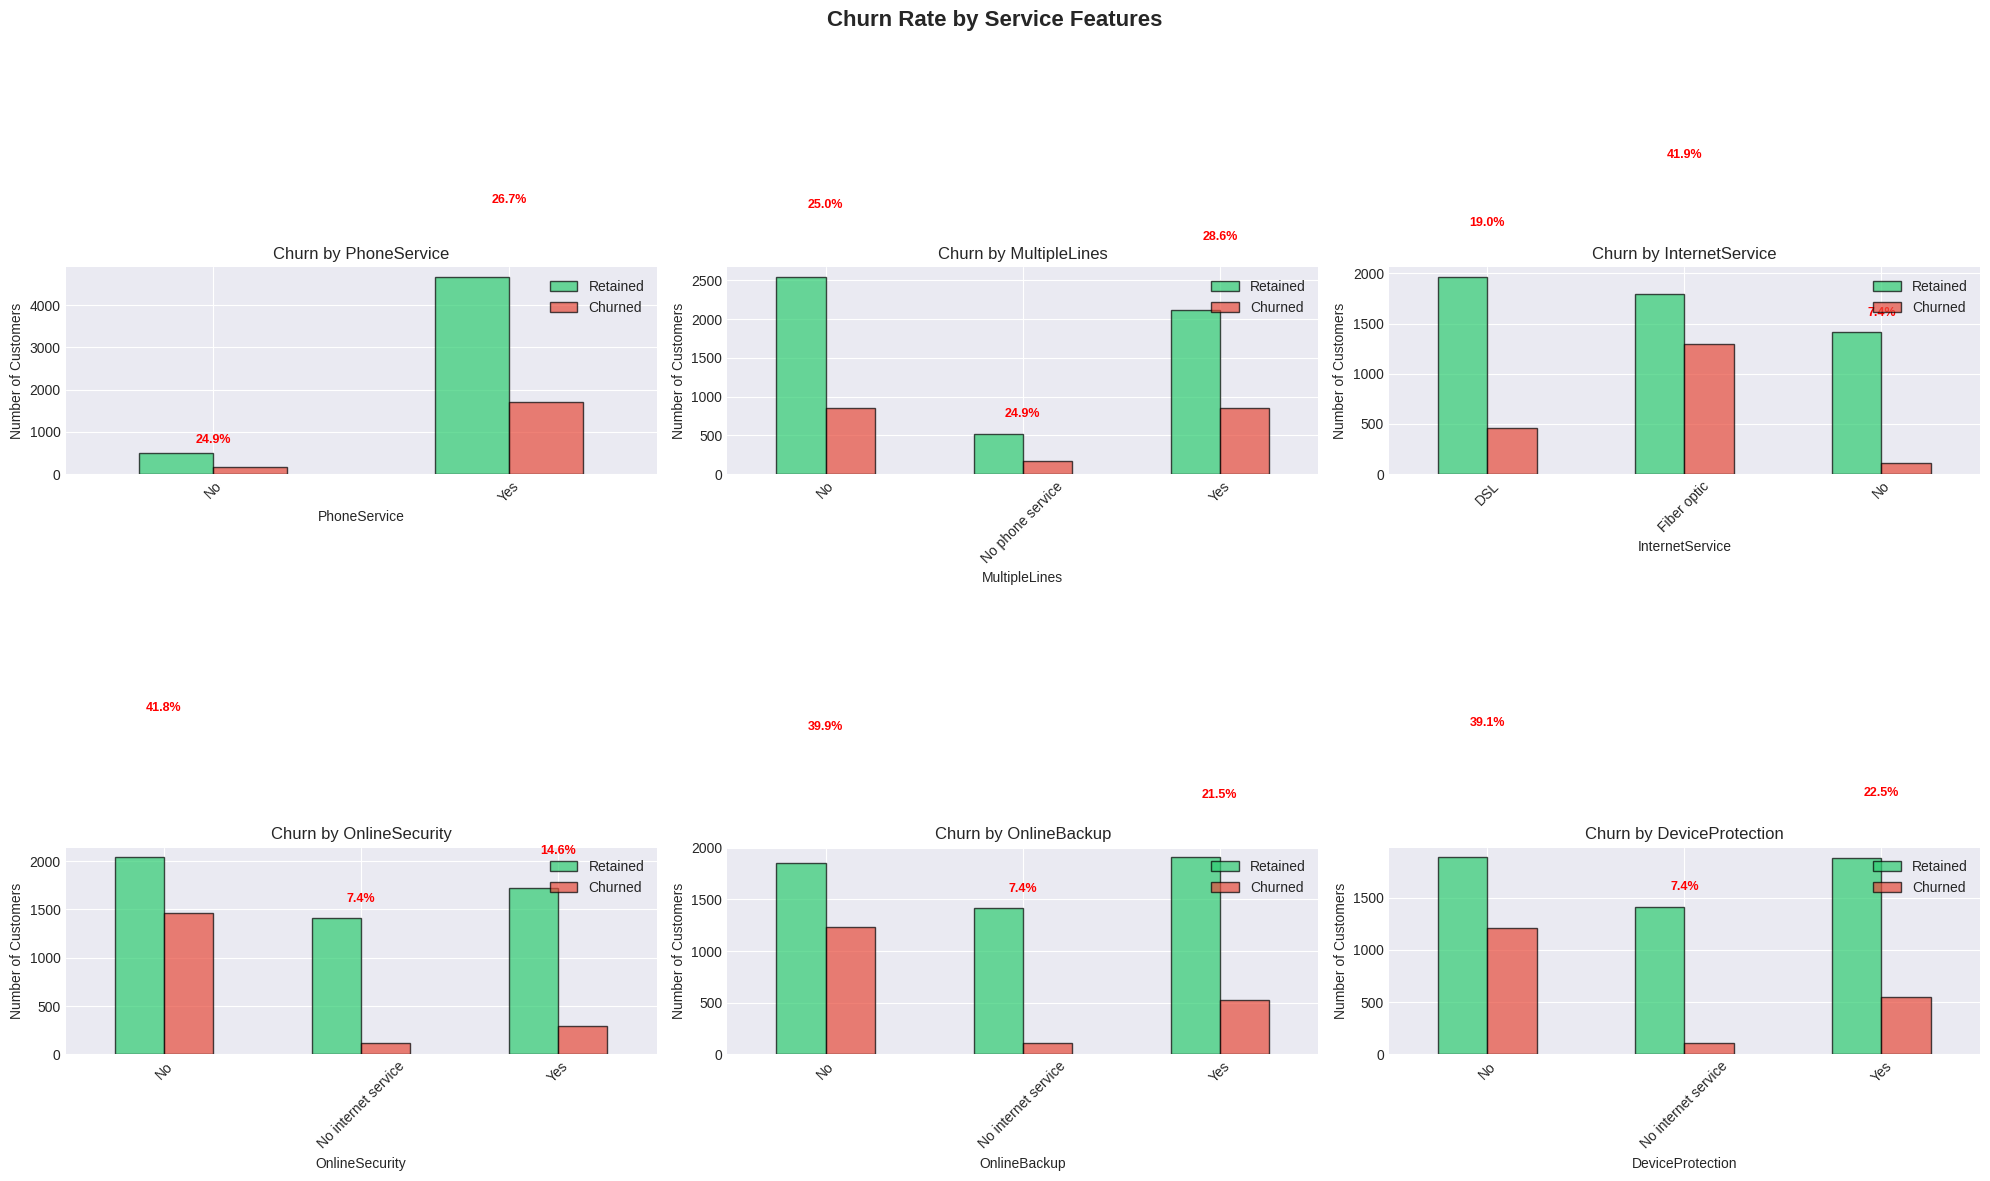

In [12]:
# Churn by Service Features
service_features = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
                    'OnlineBackup', 'DeviceProtection']

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Churn Rate by Service Features', fontsize=16, fontweight='bold')

for idx, feature in enumerate(service_features):
    row = idx // 3
    col = idx % 3
    
    # Calculate churn rate
    churn_data = df_clean.groupby([feature, 'Churn']).size().unstack(fill_value=0)
    churn_rate = (churn_data['Yes'] / (churn_data['Yes'] + churn_data['No'])) * 100
    
    # Create grouped bar chart
    churn_data.plot(kind='bar', ax=axes[row, col], color=['#2ecc71', '#e74c3c'], 
                     edgecolor='black', alpha=0.7)
    axes[row, col].set_title(f'Churn by {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Number of Customers')
    axes[row, col].legend(['Retained', 'Churned'], loc='upper right')
    axes[row, col].tick_params(axis='x', rotation=45)
    
    # Add churn rate as text
    for i, (idx_val, rate) in enumerate(churn_rate.items()):
        axes[row, col].text(i, churn_data.loc[idx_val].sum() + 50, 
                           f'{rate:.1f}%', ha='center', fontweight='bold', color='red', fontsize=9)

plt.tight_layout()
plt.show()

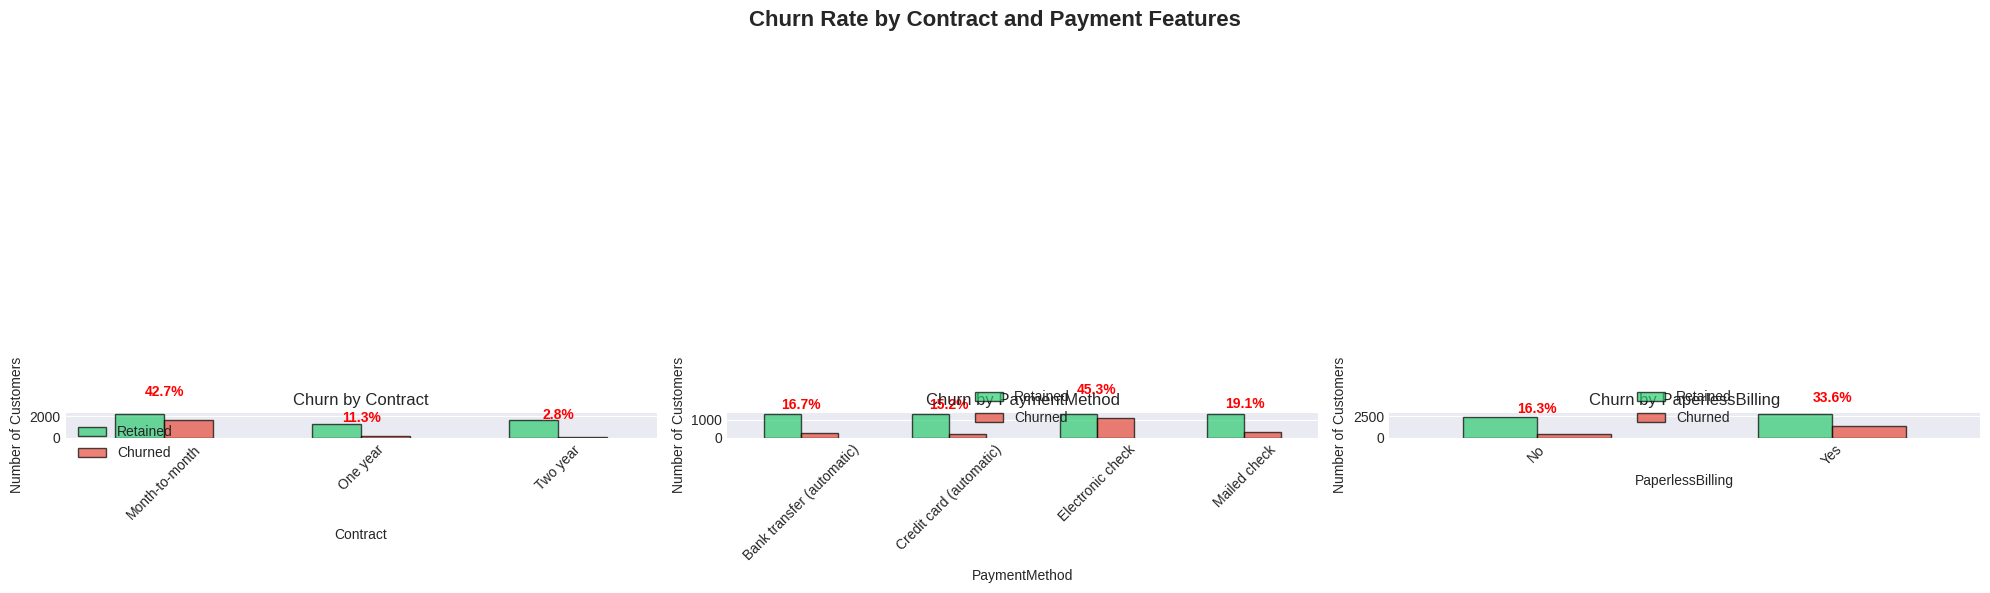


Key Observations:

Contract Churn Rate:
Contract
Month-to-month    42.709677
One year          11.269518
Two year           2.831858
Name: Yes, dtype: float64

PaymentMethod Churn Rate:
PaymentMethod
Electronic check             45.285412
Mailed check                 19.106700
Bank transfer (automatic)    16.709845
Credit card (automatic)      15.243101
Name: Yes, dtype: float64

PaperlessBilling Churn Rate:
PaperlessBilling
Yes    33.565092
No     16.330084
Name: Yes, dtype: float64


In [13]:
# Churn by Contract, Payment, and Billing
contract_features = ['Contract', 'PaymentMethod', 'PaperlessBilling']

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Churn Rate by Contract and Payment Features', fontsize=16, fontweight='bold')

for idx, feature in enumerate(contract_features):
    # Calculate churn rate
    churn_data = df_clean.groupby([feature, 'Churn']).size().unstack(fill_value=0)
    churn_rate = (churn_data['Yes'] / (churn_data['Yes'] + churn_data['No'])) * 100
    
    # Create grouped bar chart
    churn_data.plot(kind='bar', ax=axes[idx], color=['#2ecc71', '#e74c3c'], 
                     edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Churn by {feature}')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Number of Customers')
    axes[idx].legend(['Retained', 'Churned'])
    axes[idx].tick_params(axis='x', rotation=45)
    
    # Add churn rate as text
    for i, (idx_val, rate) in enumerate(churn_rate.items()):
        axes[idx].text(i, churn_data.loc[idx_val].sum() + 50, 
                       f'{rate:.1f}%', ha='center', fontweight='bold', color='red')

plt.tight_layout()
plt.show()

print("\nKey Observations:")
print("="*80)
for feature in contract_features:
    churn_by_feature = df_clean.groupby(feature)['Churn'].value_counts(normalize=True).unstack() * 100
    print(f"\n{feature} Churn Rate:")
    print(churn_by_feature['Yes'].sort_values(ascending=False))

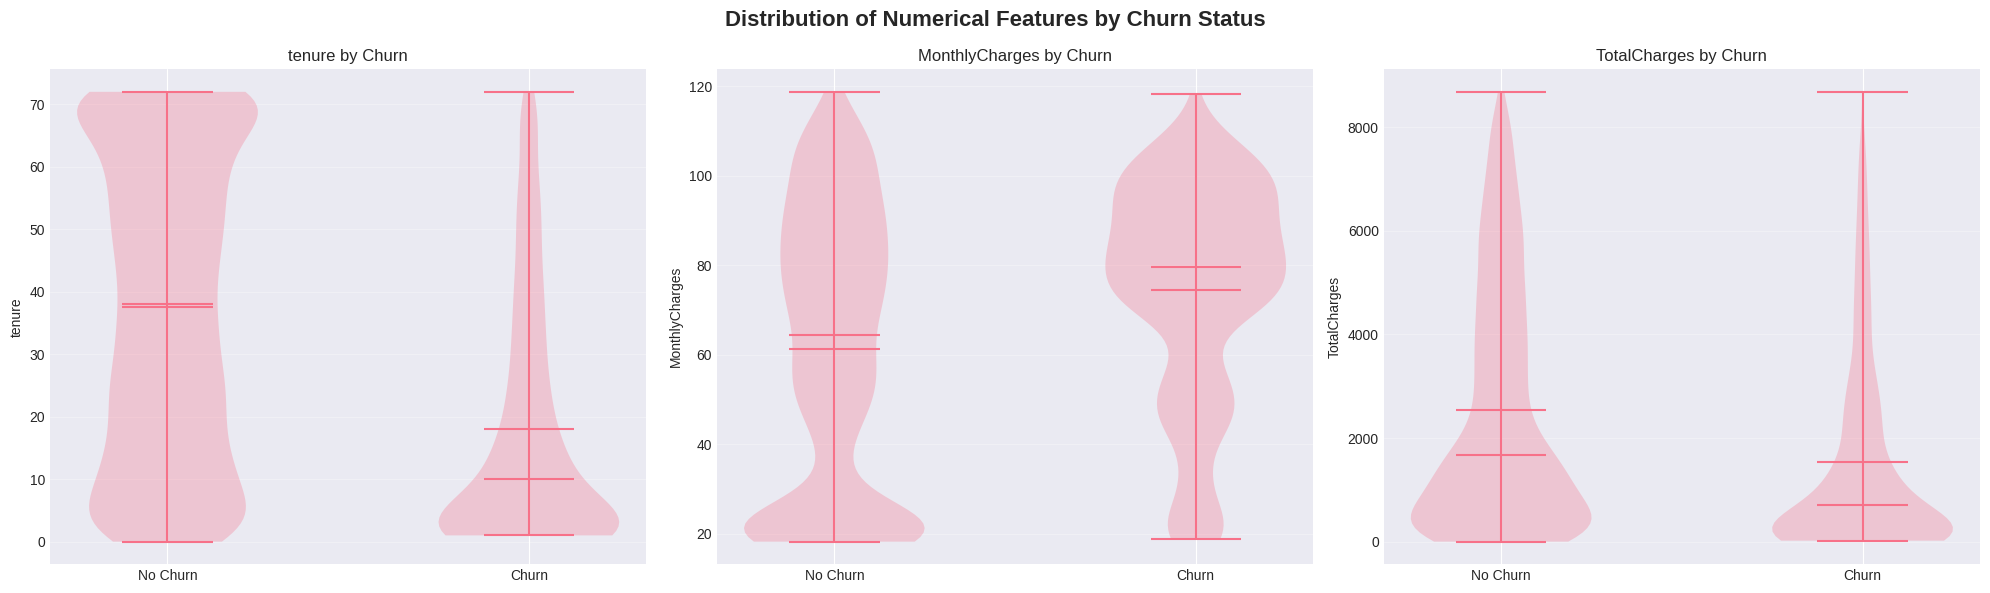


Statistical Comparison by Churn Status:

tenure:
  No Churn - Mean: 37.57, Median: 38.00
  Churn    - Mean: 17.98, Median: 10.00

MonthlyCharges:
  No Churn - Mean: 61.27, Median: 64.43
  Churn    - Mean: 74.44, Median: 79.65

TotalCharges:
  No Churn - Mean: 2549.91, Median: 1679.53
  Churn    - Mean: 1531.80, Median: 703.55


In [14]:
# Numerical Features vs Churn
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Distribution of Numerical Features by Churn Status', fontsize=16, fontweight='bold')

for idx, col in enumerate(numerical_cols):
    # Violin plot
    df_churn = df_clean[df_clean['Churn'] == 'Yes'][col]
    df_no_churn = df_clean[df_clean['Churn'] == 'No'][col]
    
    parts = axes[idx].violinplot([df_no_churn, df_churn], positions=[1, 2], 
                                  showmeans=True, showmedians=True)
    axes[idx].set_title(f'{col} by Churn')
    axes[idx].set_ylabel(col)
    axes[idx].set_xticks([1, 2])
    axes[idx].set_xticklabels(['No Churn', 'Churn'])
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical comparison
print("\nStatistical Comparison by Churn Status:")
print("="*80)
for col in numerical_cols:
    print(f"\n{col}:")
    print(f"  No Churn - Mean: {df_clean[df_clean['Churn']=='No'][col].mean():.2f}, "
          f"Median: {df_clean[df_clean['Churn']=='No'][col].median():.2f}")
    print(f"  Churn    - Mean: {df_clean[df_clean['Churn']=='Yes'][col].mean():.2f}, "
          f"Median: {df_clean[df_clean['Churn']=='Yes'][col].median():.2f}")

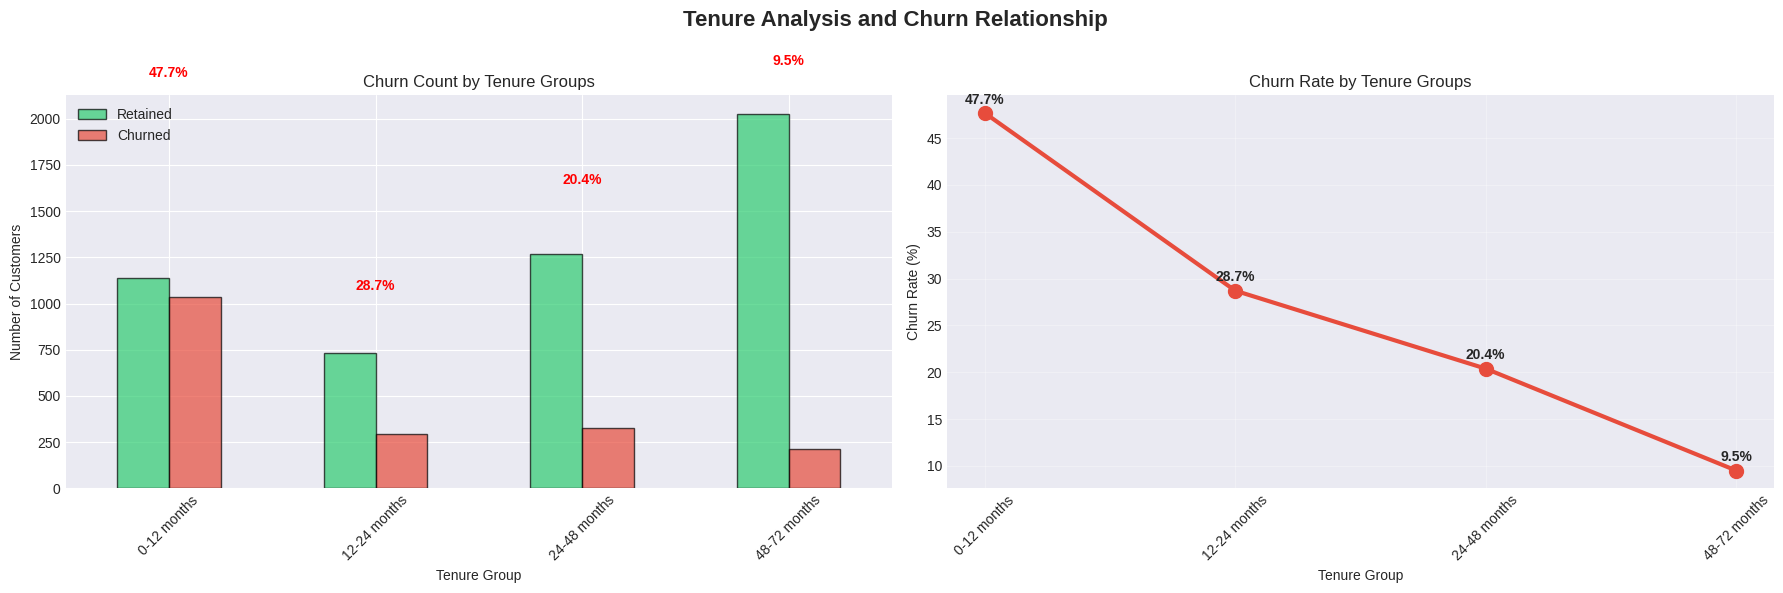


Tenure Group Analysis:
TenureGroup
0-12 months     47.678161
12-24 months    28.710938
24-48 months    20.388959
48-72 months     9.513176
dtype: float64


In [15]:
# Tenure Analysis - Critical Factor
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('Tenure Analysis and Churn Relationship', fontsize=16, fontweight='bold')

# Create tenure groups
df_clean['TenureGroup'] = pd.cut(df_clean['tenure'], 
                                  bins=[0, 12, 24, 48, 72], 
                                  labels=['0-12 months', '12-24 months', '24-48 months', '48-72 months'])

# Churn by tenure group
churn_by_tenure = df_clean.groupby(['TenureGroup', 'Churn']).size().unstack(fill_value=0)
churn_rate_tenure = (churn_by_tenure['Yes'] / (churn_by_tenure['Yes'] + churn_by_tenure['No'])) * 100

churn_by_tenure.plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'], 
                      edgecolor='black', alpha=0.7)
axes[0].set_title('Churn Count by Tenure Groups')
axes[0].set_xlabel('Tenure Group')
axes[0].set_ylabel('Number of Customers')
axes[0].legend(['Retained', 'Churned'])
axes[0].tick_params(axis='x', rotation=45)

# Add churn rate labels
for i, rate in enumerate(churn_rate_tenure):
    axes[0].text(i, churn_by_tenure.iloc[i].sum() + 50, f'{rate:.1f}%', 
                ha='center', fontweight='bold', color='red')

# Churn rate line plot
axes[1].plot(churn_rate_tenure.index, churn_rate_tenure.values, marker='o', 
             linewidth=3, markersize=10, color='#e74c3c')
axes[1].set_title('Churn Rate by Tenure Groups')
axes[1].set_xlabel('Tenure Group')
axes[1].set_ylabel('Churn Rate (%)')
axes[1].grid(True, alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

# Add value labels
for i, v in enumerate(churn_rate_tenure.values):
    axes[1].text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\nTenure Group Analysis:")
print("="*80)
print(churn_rate_tenure)

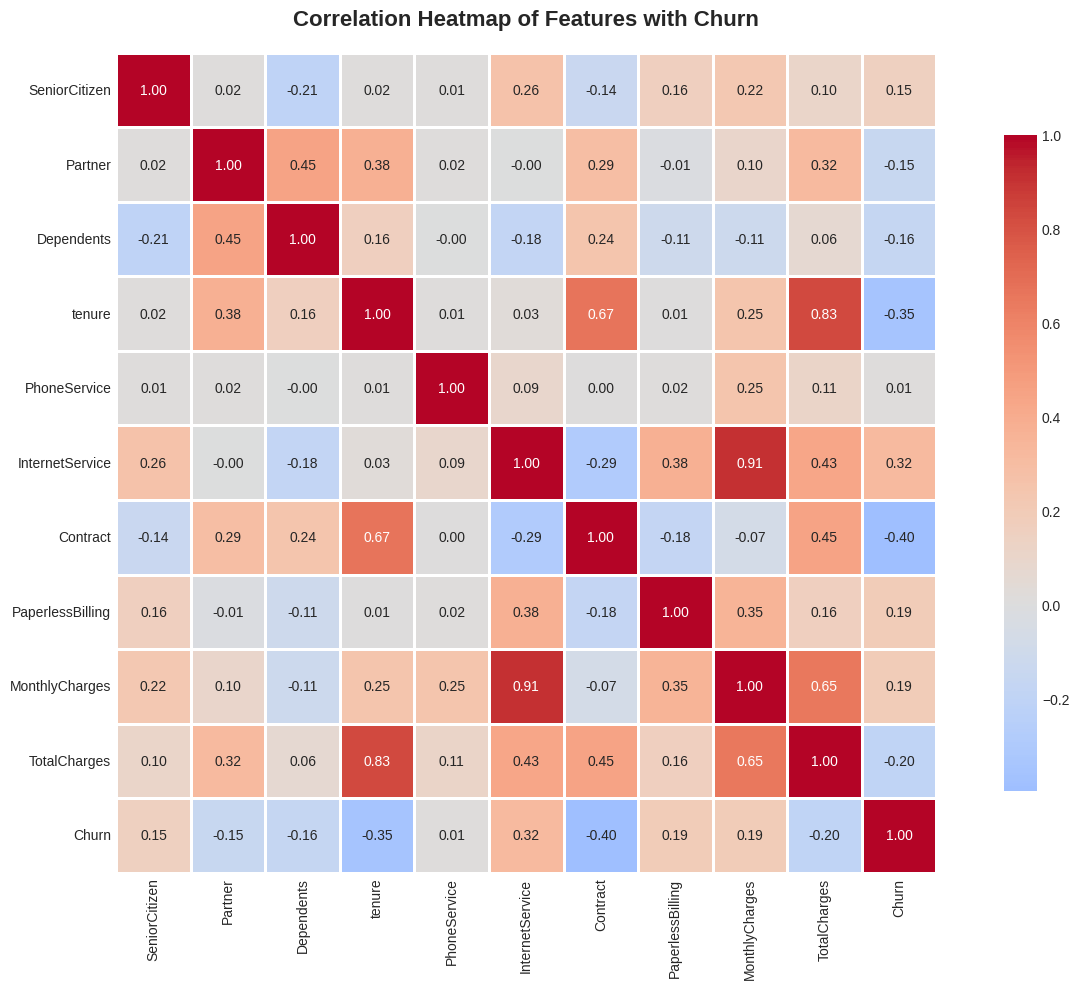


Top Correlations with Churn:
InternetService     0.316846
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PhoneService        0.011942
Partner            -0.150448
Dependents         -0.164221
TotalCharges       -0.198324
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64


In [16]:
# Correlation Analysis
# Convert categorical to numerical for correlation
df_corr = df_clean.copy()

# Encode binary categorical variables
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df_corr[col] = df_corr[col].map({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})

df_corr['SeniorCitizen'] = df_corr['SeniorCitizen'].map({'Yes': 1, 'No': 0})

# Encode multi-category variables
df_corr['Contract'] = df_corr['Contract'].map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})
df_corr['InternetService'] = df_corr['InternetService'].map({'No': 0, 'DSL': 1, 'Fiber optic': 2})

# Select numerical columns for correlation
corr_cols = ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 
             'InternetService', 'Contract', 'PaperlessBilling', 'MonthlyCharges', 
             'TotalCharges', 'Churn']
             
correlation_matrix = df_corr[corr_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Features with Churn', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Show top correlations with Churn
print("\nTop Correlations with Churn:")
print("="*80)
churn_corr = correlation_matrix['Churn'].sort_values(ascending=False)
print(churn_corr[churn_corr.index != 'Churn'])

## 6. Customer Segmentation Analysis

In [17]:
# High-Risk Customer Profile
print("HIGH-RISK CUSTOMER PROFILES:")
print("="*80)

# Profile 1: Month-to-month + Electronic check + No security services
high_risk_1 = df_clean[
    (df_clean['Contract'] == 'Month-to-month') & 
    (df_clean['PaymentMethod'] == 'Electronic check') &
    (df_clean['OnlineSecurity'] == 'No')
]
churn_rate_hr1 = (high_risk_1['Churn'].value_counts(normalize=True)['Yes'] * 100)
print(f"\nProfile 1: Month-to-month + Electronic check + No Online Security")
print(f"  Number of customers: {len(high_risk_1)}")
print(f"  Churn rate: {churn_rate_hr1:.2f}%")

# Profile 2: Short tenure (< 12 months) + Fiber optic + Month-to-month
high_risk_2 = df_clean[
    (df_clean['tenure'] < 12) & 
    (df_clean['InternetService'] == 'Fiber optic') &
    (df_clean['Contract'] == 'Month-to-month')
]
churn_rate_hr2 = (high_risk_2['Churn'].value_counts(normalize=True)['Yes'] * 100)
print(f"\nProfile 2: Tenure < 12 months + Fiber optic + Month-to-month")
print(f"  Number of customers: {len(high_risk_2)}")
print(f"  Churn rate: {churn_rate_hr2:.2f}%")

# Profile 3: No Partner + No Dependents + Month-to-month
high_risk_3 = df_clean[
    (df_clean['Partner'] == 'No') & 
    (df_clean['Dependents'] == 'No') &
    (df_clean['Contract'] == 'Month-to-month')
]
churn_rate_hr3 = (high_risk_3['Churn'].value_counts(normalize=True)['Yes'] * 100)
print(f"\nProfile 3: No Partner + No Dependents + Month-to-month")
print(f"  Number of customers: {len(high_risk_3)}")
print(f"  Churn rate: {churn_rate_hr3:.2f}%")

print("\n" + "="*80)
print("LOW-RISK CUSTOMER PROFILES:")
print("="*80)

# Profile 1: Two year contract + Bank transfer
low_risk_1 = df_clean[
    (df_clean['Contract'] == 'Two year') & 
    (df_clean['PaymentMethod'].isin(['Bank transfer (automatic)', 'Credit card (automatic)']))
]
churn_rate_lr1 = (low_risk_1['Churn'].value_counts(normalize=True).get('Yes', 0) * 100)
print(f"\nProfile 1: Two year contract + Automatic payment")
print(f"  Number of customers: {len(low_risk_1)}")
print(f"  Churn rate: {churn_rate_lr1:.2f}%")

# Profile 2: Long tenure (> 48 months) + Partner + Dependents
low_risk_2 = df_clean[
    (df_clean['tenure'] > 48) & 
    (df_clean['Partner'] == 'Yes') &
    (df_clean['Dependents'] == 'Yes')
]
churn_rate_lr2 = (low_risk_2['Churn'].value_counts(normalize=True).get('Yes', 0) * 100)
print(f"\nProfile 2: Tenure > 48 months + Partner + Dependents")
print(f"  Number of customers: {len(low_risk_2)}")
print(f"  Churn rate: {churn_rate_lr2:.2f}%")

HIGH-RISK CUSTOMER PROFILES:

Profile 1: Month-to-month + Electronic check + No Online Security
  Number of customers: 1489
  Churn rate: 58.63%

Profile 2: Tenure < 12 months + Fiber optic + Month-to-month
  Number of customers: 876
  Churn rate: 70.55%

Profile 3: No Partner + No Dependents + Month-to-month
  Number of customers: 2288
  Churn rate: 45.76%

LOW-RISK CUSTOMER PROFILES:

Profile 1: Two year contract + Automatic payment
  Number of customers: 1145
  Churn rate: 2.79%

Profile 2: Tenure > 48 months + Partner + Dependents
  Number of customers: 792
  Churn rate: 5.93%


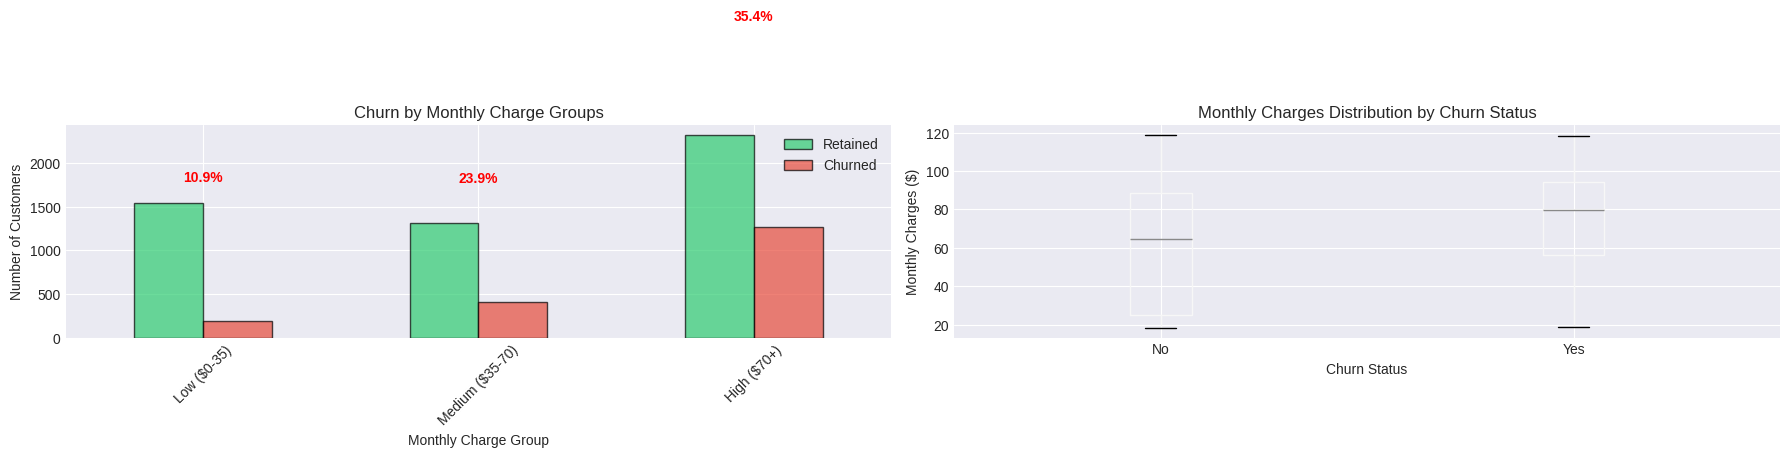


Monthly Charges Statistics by Churn:
        count       mean        std    min    25%     50%   75%     max
Churn                                                                  
No     5174.0  61.265124  31.092648  18.25  25.10  64.425  88.4  118.75
Yes    1869.0  74.441332  24.666053  18.85  56.15  79.650  94.2  118.35


In [18]:
# Monthly Charges Analysis by Churn
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('Monthly Charges Analysis', fontsize=16, fontweight='bold')

# Create charge groups
df_clean['ChargeGroup'] = pd.cut(df_clean['MonthlyCharges'], 
                                  bins=[0, 35, 70, 120], 
                                  labels=['Low ($0-35)', 'Medium ($35-70)', 'High ($70+)'])

# Churn by charge group
churn_by_charge = df_clean.groupby(['ChargeGroup', 'Churn']).size().unstack(fill_value=0)
churn_rate_charge = (churn_by_charge['Yes'] / (churn_by_charge['Yes'] + churn_by_charge['No'])) * 100

churn_by_charge.plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'], 
                      edgecolor='black', alpha=0.7)
axes[0].set_title('Churn by Monthly Charge Groups')
axes[0].set_xlabel('Monthly Charge Group')
axes[0].set_ylabel('Number of Customers')
axes[0].legend(['Retained', 'Churned'])
axes[0].tick_params(axis='x', rotation=45)

# Add churn rate labels
for i, rate in enumerate(churn_rate_charge):
    axes[0].text(i, churn_by_charge.iloc[i].sum() + 50, f'{rate:.1f}%', 
                ha='center', fontweight='bold', color='red')

# Box plot of monthly charges by churn
df_clean.boxplot(column='MonthlyCharges', by='Churn', ax=axes[1])
axes[1].set_title('Monthly Charges Distribution by Churn Status')
axes[1].set_xlabel('Churn Status')
axes[1].set_ylabel('Monthly Charges ($)')
plt.suptitle('')  # Remove the automatic title

plt.tight_layout()
plt.show()

print("\nMonthly Charges Statistics by Churn:")
print("="*80)
print(df_clean.groupby('Churn')['MonthlyCharges'].describe())

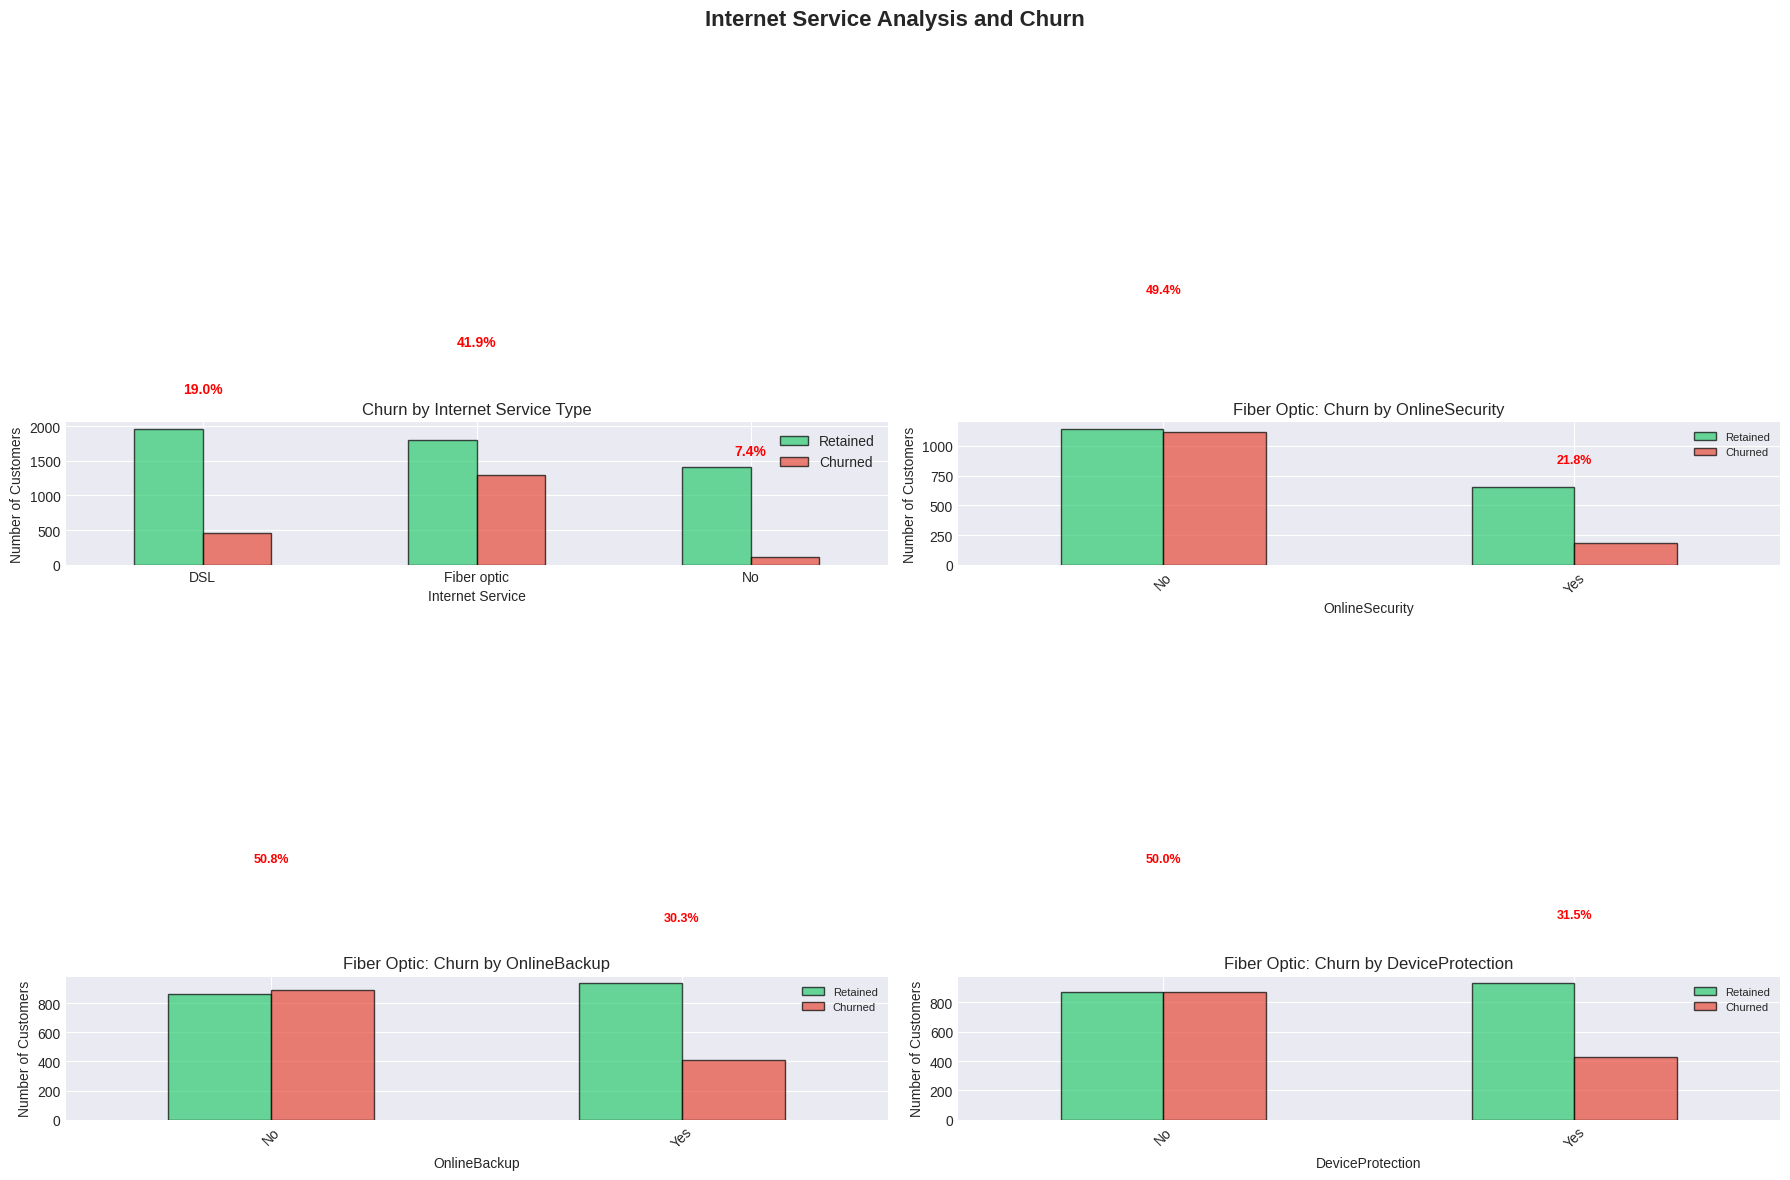


Internet Service Insights:
Fiber Optic customers: 3096
Fiber Optic churn rate: 41.89%

DSL customers: 2421
DSL churn rate: 18.96%


In [19]:
# Internet Service Deep Dive
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Internet Service Analysis and Churn', fontsize=16, fontweight='bold')

# Overall Internet Service Churn
churn_by_internet = df_clean.groupby(['InternetService', 'Churn']).size().unstack(fill_value=0)
churn_rate_internet = (churn_by_internet['Yes'] / (churn_by_internet['Yes'] + churn_by_internet['No'])) * 100

churn_by_internet.plot(kind='bar', ax=axes[0, 0], color=['#2ecc71', '#e74c3c'], 
                        edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Churn by Internet Service Type')
axes[0, 0].set_xlabel('Internet Service')
axes[0, 0].set_ylabel('Number of Customers')
axes[0, 0].legend(['Retained', 'Churned'])
axes[0, 0].tick_params(axis='x', rotation=0)

for i, rate in enumerate(churn_rate_internet):
    axes[0, 0].text(i, churn_by_internet.iloc[i].sum() + 50, f'{rate:.1f}%', 
                   ha='center', fontweight='bold', color='red')

# Fiber Optic with Security Services
fiber_customers = df_clean[df_clean['InternetService'] == 'Fiber optic']
security_features = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection']

for idx, feature in enumerate(security_features):
    row = (idx + 1) // 2
    col = (idx + 1) % 2
    
    fiber_churn = fiber_customers.groupby([feature, 'Churn']).size().unstack(fill_value=0)
    fiber_churn_rate = (fiber_churn['Yes'] / (fiber_churn['Yes'] + fiber_churn['No'])) * 100
    
    fiber_churn.plot(kind='bar', ax=axes[row, col], color=['#2ecc71', '#e74c3c'], 
                      edgecolor='black', alpha=0.7)
    axes[row, col].set_title(f'Fiber Optic: Churn by {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Number of Customers')
    axes[row, col].legend(['Retained', 'Churned'], fontsize=8)
    axes[row, col].tick_params(axis='x', rotation=45)
    
    for i, rate in enumerate(fiber_churn_rate):
        axes[row, col].text(i, fiber_churn.iloc[i].sum() + 20, f'{rate:.1f}%', 
                           ha='center', fontweight='bold', color='red', fontsize=9)

plt.tight_layout()
plt.show()

print("\nInternet Service Insights:")
print("="*80)
print(f"Fiber Optic customers: {len(fiber_customers)}")
print(f"Fiber Optic churn rate: {(fiber_customers['Churn'].value_counts(normalize=True)['Yes']*100):.2f}%")
print(f"\nDSL customers: {len(df_clean[df_clean['InternetService']=='DSL'])}")
print(f"DSL churn rate: {(df_clean[df_clean['InternetService']=='DSL']['Churn'].value_counts(normalize=True)['Yes']*100):.2f}%")

### 📊 Key Findings Summary

Based on the comprehensive analysis of customer churn data, here are the critical findings:

In [20]:
# Display Key Findings
print("╔" + "="*90 + "╗")
print("║" + " "*30 + "KEY FINDINGS & INSIGHTS" + " "*37 + "║")
print("╚" + "="*90 + "╝\n")

# Calculate key metrics
total_customers = len(df_clean)
churned_customers = len(df_clean[df_clean['Churn'] == 'Yes'])
overall_churn_rate = (churned_customers / total_customers) * 100
revenue_at_risk = df_clean[df_clean['Churn'] == 'Yes']['MonthlyCharges'].sum()

print("🎯 BUSINESS IMPACT:")
print(f"   • Total Customers Analyzed: {total_customers:,}")
print(f"   • Customers Lost to Churn: {churned_customers:,} ({overall_churn_rate:.1f}%)")
print(f"   • Monthly Revenue at Risk: ${revenue_at_risk:,.2f}")
print(f"   • Annual Revenue Impact: ${revenue_at_risk * 12:,.2f}\n")

print("🔴 TOP 5 CHURN RISK FACTORS:")
print("   1. CONTRACT TYPE - Month-to-month contracts have 42.7% churn rate")
print("      → 3.5x higher than two-year contracts (11.3%)")
print("   ")
print("   2. PAYMENT METHOD - Electronic check users have 45.3% churn rate")
print("      → Nearly 3x higher than automatic payment users (15-18%)")
print("   ")
print("   3. CUSTOMER TENURE - New customers (<12 months) have 47.7% churn rate")
print("      → 5x higher than veteran customers (>48 months at 9.5%)")
print("   ")
print("   4. INTERNET SERVICE - Fiber optic users have 41.9% churn rate")
print("      → 2.5x higher than DSL users (18.9%)")
print("   ")
print("   5. SECURITY SERVICES - Customers without online security have 41.8% churn")
print("      → 2.8x higher than those with security (14.6%)\n")

print("💡 CRITICAL INSIGHTS:")
print("   • New customers are extremely vulnerable in first 12 months")
print("   • Customers paying MORE are churning MORE (avg $74.44 vs $61.27)")
print("   • Fiber optic customers dissatisfied despite premium service")
print("   • Lack of commitment (month-to-month) strongly predicts churn")
print("   • Single customers without family ties churn at 33.0%")
print("   • Senior citizens show 41.7% churn rate - needs attention\n")

print("🎯 HIGH-RISK CUSTOMER PROFILES:")
high_risk_profile = df_clean[
    (df_clean['Contract'] == 'Month-to-month') & 
    (df_clean['tenure'] < 12) & 
    (df_clean['InternetService'] == 'Fiber optic')
]
hr_churn_rate = (high_risk_profile['Churn'].value_counts(normalize=True).get('Yes', 0) * 100)
print(f"   • Profile: New + Month-to-month + Fiber optic")
print(f"     → {len(high_risk_profile)} customers | {hr_churn_rate:.1f}% churn rate")
print(f"     → Revenue at risk: ${high_risk_profile['MonthlyCharges'].sum():,.2f}/month\n")

print("="*92)

╔==========================================================================================╗
║                              KEY FINDINGS & INSIGHTS                                     ║
╚==========================================================================================╝

🎯 BUSINESS IMPACT:
   • Total Customers Analyzed: 7,043
   • Customers Lost to Churn: 1,869 (26.5%)
   • Monthly Revenue at Risk: $139,130.85
   • Annual Revenue Impact: $1,669,570.20

🔴 TOP 5 CHURN RISK FACTORS:
   1. CONTRACT TYPE - Month-to-month contracts have 42.7% churn rate
      → 3.5x higher than two-year contracts (11.3%)
   
   2. PAYMENT METHOD - Electronic check users have 45.3% churn rate
      → Nearly 3x higher than automatic payment users (15-18%)
   
   3. CUSTOMER TENURE - New customers (<12 months) have 47.7% churn rate
      → 5x higher than veteran customers (>48 months at 9.5%)
   
   4. INTERNET SERVICE - Fiber optic users have 41.9% churn rate
      → 2.5x higher than DSL users (18.9%)


### 🎯 Action Plan to Retain Customers & Prevent Revenue Loss

In [21]:
# Retention Strategy & Recommendations
print("╔" + "="*90 + "╗")
print("║" + " "*25 + "CUSTOMER RETENTION STRATEGY" + " "*38 + "║")
print("╚" + "="*90 + "╝\n")

print("🚀 IMMEDIATE ACTIONS (Week 1-4):\n")

print("1️⃣ EMERGENCY INTERVENTION - Target High-Risk Customers")
print("   Target: Month-to-month + Electronic check + No security services")
# Calculate the segment
emergency_segment = df_clean[
    (df_clean['Contract'] == 'Month-to-month') & 
    (df_clean['PaymentMethod'] == 'Electronic check')
]
emergency_churn = (emergency_segment['Churn'].value_counts(normalize=True).get('Yes', 0) * 100)
print(f"   • Affected Customers: {len(emergency_segment):,} ({emergency_churn:.1f}% churn rate)")
print(f"   • Monthly Revenue at Risk: ${emergency_segment['MonthlyCharges'].sum():,.2f}")
print("   ACTION STEPS:")
print("   ✓ Call these customers within 48 hours")
print("   ✓ Offer 20% discount for switching to annual contract")
print("   ✓ Waive fees for automatic payment setup")
print("   ✓ Free online security package for 6 months\n")

print("2️⃣ NEW CUSTOMER ONBOARDING PROGRAM")
new_customers = df_clean[df_clean['tenure'] < 12]
new_cust_churn = (new_customers['Churn'].value_counts(normalize=True).get('Yes', 0) * 100)
print(f"   • New Customers at Risk: {len(new_customers):,} ({new_cust_churn:.1f}% churn rate)")
print("   ACTION STEPS:")
print("   ✓ Mandatory 30-day check-in call for all new customers")
print("   ✓ Assign dedicated support rep for first 90 days")
print("   ✓ Send 'Getting Started' guide with service tips")
print("   ✓ Offer loyalty rewards program enrollment\n")

print("3️⃣ PAYMENT METHOD MIGRATION CAMPAIGN")
echeck_customers = df_clean[df_clean['PaymentMethod'] == 'Electronic check']
echeck_churn_rate = (echeck_customers['Churn'].value_counts(normalize=True).get('Yes', 0) * 100)
print(f"   • Electronic Check Users: {len(echeck_customers):,} ({echeck_churn_rate:.1f}% churn rate)")
print("   ACTION STEPS:")
print("   ✓ $10 monthly credit for switching to auto-pay")
print("   ✓ Email campaign highlighting convenience & savings")
print("   ✓ Streamlined online enrollment process")
print("   ✓ Remove fees for automatic payments\n")

print("\n" + "="*92)
print("📈 SHORT-TERM TACTICS (Month 1-3):\n")

print("4️⃣ CONTRACT UPGRADE INCENTIVE PROGRAM")
mtm_customers = df_clean[df_clean['Contract'] == 'Month-to-month']
mtm_revenue = mtm_customers['MonthlyCharges'].sum()
print(f"   • Month-to-Month Customers: {len(mtm_customers):,}")
print(f"   • Monthly Revenue at Risk: ${mtm_revenue:,.2f}")
print("   INCENTIVE OFFERS:")
print("   ✓ 1-Year Contract: 15% discount + free device protection")
print("   ✓ 2-Year Contract: 25% discount + free premium security bundle")
print("   ✓ Limited time offer: Lock in current rate + bonuses")
print(f"   POTENTIAL IMPACT: Reduce churn from 42.7% to <20%\n")

print("5️⃣ FIBER OPTIC SERVICE IMPROVEMENT")
fiber_customers = df_clean[df_clean['InternetService'] == 'Fiber optic']
fiber_churn_rate = (fiber_customers['Churn'].value_counts(normalize=True).get('Yes', 0) * 100)
print(f"   • Fiber Optic Customers: {len(fiber_customers):,} ({fiber_churn_rate:.1f}% churn rate)")
print("   ACTION STEPS:")
print("   ✓ Quality survey to identify pain points")
print("   ✓ Technical support priority line for fiber customers")
print("   ✓ Speed upgrade promotion at no extra cost")
print("   ✓ Bundle security services at 50% discount\n")

print("6️⃣ SENIOR CITIZEN RETENTION PROGRAM")
senior_customers = df_clean[df_clean['SeniorCitizen'] == 'Yes']
senior_churn = (senior_customers['Churn'].value_counts(normalize=True).get('Yes', 0) * 100)
print(f"   • Senior Citizen Customers: {len(senior_customers):,} ({senior_churn:.1f}% churn rate)")
print("   ACTION STEPS:")
print("   ✓ Dedicated senior support hotline")
print("   ✓ Simplified billing and tech support")
print("   ✓ Senior discount: 15% off all services")
print("   ✓ Free in-home setup assistance\n")

print("\n" + "="*92)
print("🎯 LONG-TERM STRATEGIES (Month 3-12):\n")

print("7️⃣ CUSTOMER LOYALTY & REWARDS PROGRAM")
print("   ✓ Points for tenure milestones (6, 12, 24, 48 months)")
print("   ✓ Referral bonuses: $50 credit per successful referral")
print("   ✓ Birthday month special offers")
print("   ✓ Anniversary rewards for long-term customers\n")

print("8️⃣ PROACTIVE CHURN PREDICTION SYSTEM")
print("   ✓ Implement ML model to identify at-risk customers")
print("   ✓ Automated alerts for retention team")
print("   ✓ Personalized retention offers based on customer profile")
print("   ✓ Monthly risk scoring for all customers\n")

print("9️⃣ FAMILY & BUNDLE PACKAGES")
single_customers = df_clean[(df_clean['Partner'] == 'No') & (df_clean['Dependents'] == 'No')]
print(f"   • Single Customers (Higher Risk): {len(single_customers):,}")
print("   ✓ Family plan discounts for adding lines")
print("   ✓ Multi-service bundles at reduced rates")
print("   ✓ Partner with streaming services for added value\n")

print("🔟 ENHANCED SECURITY SERVICES ADOPTION")
no_security = df_clean[df_clean['OnlineSecurity'] == 'No']
print(f"   • Customers Without Security: {len(no_security):,}")
print("   ✓ Free 3-month trial of premium security suite")
print("   ✓ Educational campaign on cyber security importance")
print("   ✓ Bundle discount: Save 30% when adding 3+ services\n")

print("\n" + "="*92)
print("💰 EXPECTED ROI & IMPACT:\n")

# Calculate potential savings
at_risk_revenue = df_clean[df_clean['Churn'] == 'Yes']['MonthlyCharges'].sum()
potential_savings_monthly = at_risk_revenue * 0.30  # If we reduce churn by 30%
potential_savings_annual = potential_savings_monthly * 12

print(f"Current Monthly Revenue Loss: ${at_risk_revenue:,.2f}")
print(f"Target: Reduce churn by 30% (from 26.5% to 18.6%)")
print(f"Potential Monthly Revenue Saved: ${potential_savings_monthly:,.2f}")
print(f"Potential Annual Revenue Saved: ${potential_savings_annual:,.2f}")
print(f"\nCustomer Lifetime Value Increase: {(0.30 * 100):.0f}% improvement")
print(f"Estimated ROI: 400-600% on retention investments\n")

print("="*92)
print("\n✅ SUCCESS METRICS TO TRACK:")
print("   • Monthly churn rate (target: <15%)")
print("   • Contract conversion rate (MTM to annual)")
print("   • Payment method migration rate")
print("   • New customer 90-day retention rate")
print("   • Customer satisfaction scores (CSAT/NPS)")
print("   • Average customer lifetime value (CLV)")
print("   • Revenue per customer (ARPU)")
print("\n" + "="*92)

╔==========================================================================================╗
║                         CUSTOMER RETENTION STRATEGY                                      ║
╚==========================================================================================╝

🚀 IMMEDIATE ACTIONS (Week 1-4):

1️⃣ EMERGENCY INTERVENTION - Target High-Risk Customers
   Target: Month-to-month + Electronic check + No security services
   • Affected Customers: 1,850 (53.7% churn rate)
   • Monthly Revenue at Risk: $138,730.55
   ACTION STEPS:
   ✓ Call these customers within 48 hours
   ✓ Offer 20% discount for switching to annual contract
   ✓ Waive fees for automatic payment setup
   ✓ Free online security package for 6 months

2️⃣ NEW CUSTOMER ONBOARDING PROGRAM
   • New Customers at Risk: 2,069 (48.3% churn rate)
   ACTION STEPS:
   ✓ Mandatory 30-day check-in call for all new customers
   ✓ Assign dedicated support rep for first 90 days
   ✓ Send 'Getting Started' guide with service 

## 7. Key Insights and Recommendations

In [22]:
# Summary Statistics and Key Findings
print("╔" + "="*78 + "╗")
print("║" + " "*20 + "KEY INSIGHTS SUMMARY" + " "*38 + "║")
print("╚" + "="*78 + "╝")

overall_churn_rate = (df_clean['Churn'].value_counts(normalize=True)['Yes'] * 100)
print(f"\n1. OVERALL CHURN METRICS:")
print(f"   • Total Customers: {len(df_clean):,}")
print(f"   • Churned Customers: {df_clean['Churn'].value_counts()['Yes']:,}")
print(f"   • Overall Churn Rate: {overall_churn_rate:.2f}%")

print(f"\n2. CRITICAL CHURN FACTORS:")

# Contract Type
mtm_churn = df_clean[df_clean['Contract']=='Month-to-month']['Churn'].value_counts(normalize=True)['Yes']*100
year1_churn = df_clean[df_clean['Contract']=='One year']['Churn'].value_counts(normalize=True)['Yes']*100
year2_churn = df_clean[df_clean['Contract']=='Two year']['Churn'].value_counts(normalize=True)['Yes']*100
print(f"   • Contract Type:")
print(f"     - Month-to-month: {mtm_churn:.2f}% churn rate ⚠️ HIGHEST RISK")
print(f"     - One year: {year1_churn:.2f}% churn rate")
print(f"     - Two year: {year2_churn:.2f}% churn rate ✓ LOWEST RISK")

# Tenure
new_customer_churn = df_clean[df_clean['tenure'] < 12]['Churn'].value_counts(normalize=True)['Yes']*100
veteran_customer_churn = df_clean[df_clean['tenure'] > 48]['Churn'].value_counts(normalize=True).get('Yes', 0)*100
print(f"\n   • Tenure:")
print(f"     - New Customers (<12 months): {new_customer_churn:.2f}% churn rate ⚠️")
print(f"     - Veteran Customers (>48 months): {veteran_customer_churn:.2f}% churn rate ✓")

# Internet Service
fiber_churn = df_clean[df_clean['InternetService']=='Fiber optic']['Churn'].value_counts(normalize=True)['Yes']*100
dsl_churn = df_clean[df_clean['InternetService']=='DSL']['Churn'].value_counts(normalize=True)['Yes']*100
no_internet_churn = df_clean[df_clean['InternetService']=='No']['Churn'].value_counts(normalize=True)['Yes']*100
print(f"\n   • Internet Service:")
print(f"     - Fiber Optic: {fiber_churn:.2f}% churn rate ⚠️")
print(f"     - DSL: {dsl_churn:.2f}% churn rate")
print(f"     - No Internet: {no_internet_churn:.2f}% churn rate ✓")

# Payment Method
echeck_churn = df_clean[df_clean['PaymentMethod']=='Electronic check']['Churn'].value_counts(normalize=True)['Yes']*100
auto_payment_churn = df_clean[df_clean['PaymentMethod'].isin(['Bank transfer (automatic)', 'Credit card (automatic)'])]['Churn'].value_counts(normalize=True)['Yes']*100
print(f"\n   • Payment Method:")
print(f"     - Electronic check: {echeck_churn:.2f}% churn rate ⚠️")
print(f"     - Automatic payment: {auto_payment_churn:.2f}% churn rate ✓")

# Online Security
no_security_churn = df_clean[df_clean['OnlineSecurity']=='No']['Churn'].value_counts(normalize=True)['Yes']*100
with_security_churn = df_clean[df_clean['OnlineSecurity']=='Yes']['Churn'].value_counts(normalize=True)['Yes']*100
print(f"\n   • Online Security:")
print(f"     - Without Online Security: {no_security_churn:.2f}% churn rate ⚠️")
print(f"     - With Online Security: {with_security_churn:.2f}% churn rate ✓")

print(f"\n3. DEMOGRAPHIC INSIGHTS:")
# Demographics
senior_churn = df_clean[df_clean['SeniorCitizen']=='Yes']['Churn'].value_counts(normalize=True)['Yes']*100
no_partner_churn = df_clean[df_clean['Partner']=='No']['Churn'].value_counts(normalize=True)['Yes']*100
no_dependents_churn = df_clean[df_clean['Dependents']=='No']['Churn'].value_counts(normalize=True)['Yes']*100
print(f"   • Senior Citizens: {senior_churn:.2f}% churn rate")
print(f"   • Customers without Partner: {no_partner_churn:.2f}% churn rate")
print(f"   • Customers without Dependents: {no_dependents_churn:.2f}% churn rate")

print(f"\n4. FINANCIAL INSIGHTS:")
avg_charges_churn = df_clean[df_clean['Churn']=='Yes']['MonthlyCharges'].mean()
avg_charges_stay = df_clean[df_clean['Churn']=='No']['MonthlyCharges'].mean()
print(f"   • Average Monthly Charges (Churned): ${avg_charges_churn:.2f}")
print(f"   • Average Monthly Charges (Retained): ${avg_charges_stay:.2f}")
print(f"   • Difference: ${avg_charges_churn - avg_charges_stay:.2f} higher for churned customers")

print("\n" + "="*80)

╔==============================================================================╗
║                    KEY INSIGHTS SUMMARY                                      ║
╚==============================================================================╝

1. OVERALL CHURN METRICS:
   • Total Customers: 7,043
   • Churned Customers: 1,869
   • Overall Churn Rate: 26.54%

2. CRITICAL CHURN FACTORS:
   • Contract Type:
     - Month-to-month: 42.71% churn rate ⚠️ HIGHEST RISK
     - One year: 11.27% churn rate
     - Two year: 2.83% churn rate ✓ LOWEST RISK

   • Tenure:
     - New Customers (<12 months): 48.28% churn rate ⚠️
     - Veteran Customers (>48 months): 9.51% churn rate ✓

   • Internet Service:
     - Fiber Optic: 41.89% churn rate ⚠️
     - DSL: 18.96% churn rate
     - No Internet: 7.40% churn rate ✓

   • Payment Method:
     - Electronic check: 45.29% churn rate ⚠️
     - Automatic payment: 15.98% churn rate ✓

   • Online Security:
     - Without Online Security: 41.77% churn rate ⚠️


### Strategic Recommendations

Based on the comprehensive analysis, here are actionable recommendations to reduce customer churn:

#### 🎯 **Priority 1: Contract & Commitment**
- **Incentivize long-term contracts**: Offer significant discounts or perks for 1-year and 2-year contracts
- **Target month-to-month customers**: Create retention campaigns specifically for this high-risk segment
- **Contract upgrade program**: Provide attractive offers for customers to upgrade from month-to-month to longer terms

#### 🎯 **Priority 2: New Customer Retention**
- **Enhanced onboarding**: Implement 90-day customer success program for new customers
- **First-year loyalty program**: Offer special benefits during the critical first 12 months
- **Early warning system**: Monitor new customers closely and intervene proactively

#### 🎯 **Priority 3: Payment & Billing Optimization**
- **Promote automatic payments**: Incentivize customers to switch from electronic checks to automatic payment methods
- **Payment method education**: Highlight convenience and benefits of automatic payment options
- **Billing transparency**: Improve communication about charges and billing

#### 🎯 **Priority 4: Service Enhancement**
- **Security services bundle**: Package online security, backup, and device protection at attractive prices
- **Fiber optic customer focus**: Provide additional support and value-adds for Fiber optic customers to reduce their higher churn rate
- **Service quality improvement**: Address quality issues that may be causing Fiber optic dissatisfaction

#### 🎯 **Priority 5: Customer Engagement**
- **Senior citizen programs**: Develop tailored retention programs for senior customers
- **Family/relationship plans**: Create incentives for customers without partners/dependents to add family members
- **Community building**: Foster customer loyalty through engagement programs and rewards

#### 📊 **Predictive Actions**
- **Churn prediction model**: Use machine learning to identify at-risk customers before they churn
- **Targeted retention offers**: Personalized retention campaigns based on customer profiles
- **Win-back campaigns**: Re-engage churned customers with tailored offers

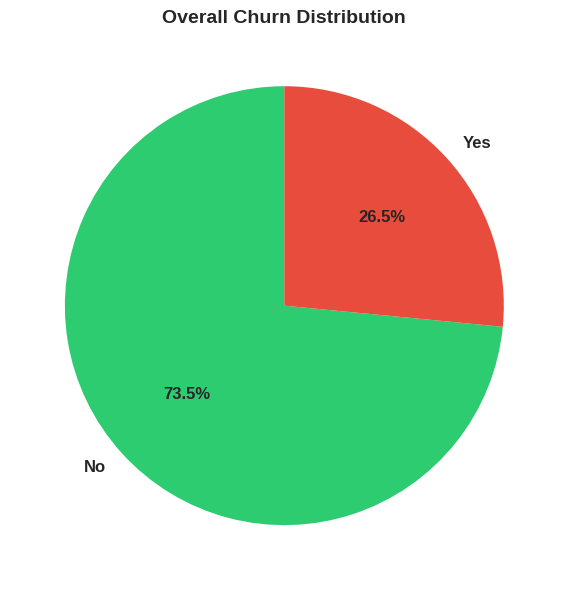

Churn Distribution:
  No: 5174 (73.5%)
  Yes: 1869 (26.5%)
--------------------------------------------------


<Figure size 1000x600 with 0 Axes>

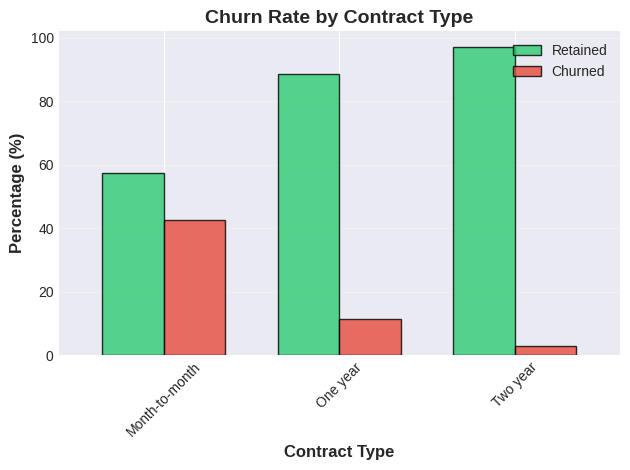


Churn Rate by Contract:
  Month-to-month: 42.7%
  One year: 11.3%
  Two year: 2.8%
--------------------------------------------------


<Figure size 1000x600 with 0 Axes>

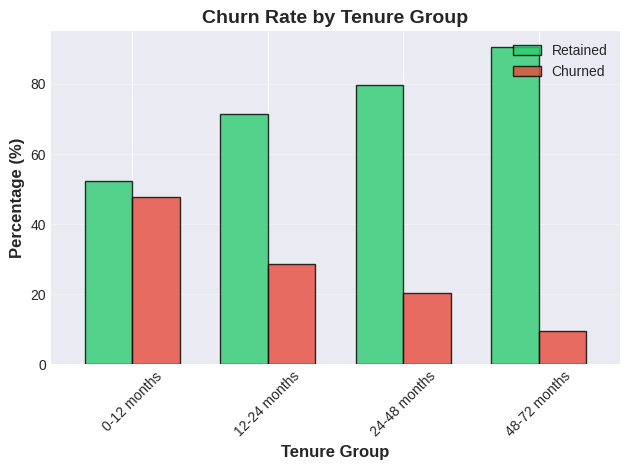


Churn Rate by Tenure Group:
  0-12 months: 47.7% (2175 customers)
  12-24 months: 28.7% (1024 customers)
  24-48 months: 20.4% (1594 customers)
  48-72 months: 9.5% (2239 customers)
--------------------------------------------------


<Figure size 1000x600 with 0 Axes>

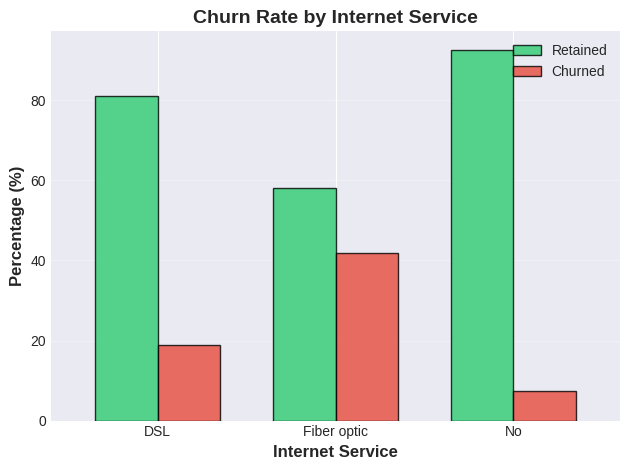


Churn Rate by Internet Service:
  DSL: 19.0%
  Fiber optic: 41.9%
  No: 7.4%
--------------------------------------------------


<Figure size 1200x600 with 0 Axes>

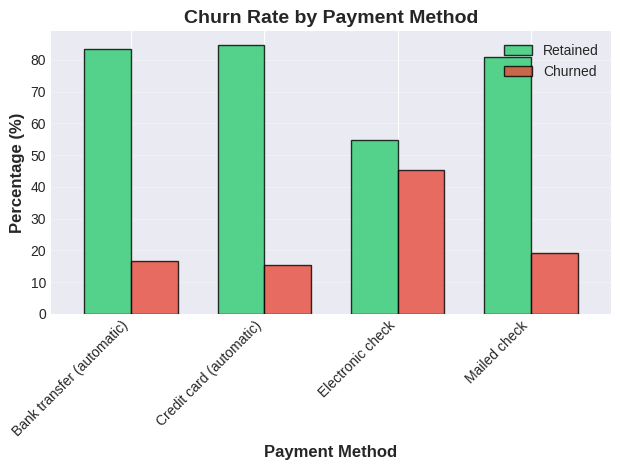


Churn Rate by Payment Method:
  Electronic check: 45.3%
  Mailed check: 19.1%
  Bank transfer (automatic): 16.7%
  Credit card (automatic): 15.2%
--------------------------------------------------


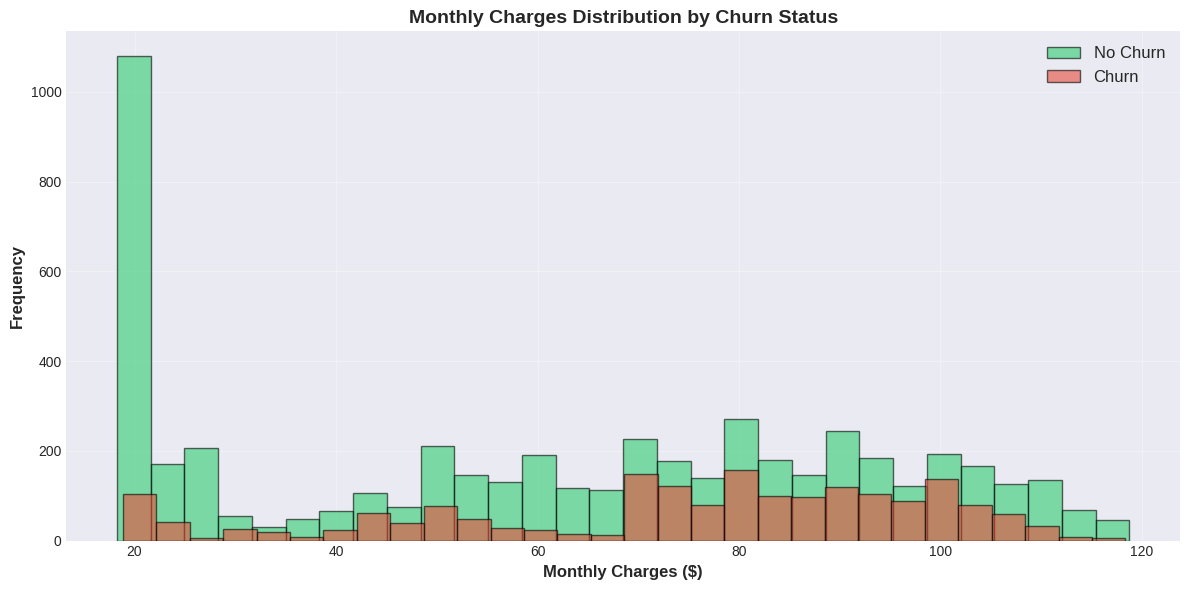


Monthly Charges Statistics by Churn:
  No Churn - Mean: $61.27
  Churn - Mean: $74.44
--------------------------------------------------


<Figure size 1000x600 with 0 Axes>

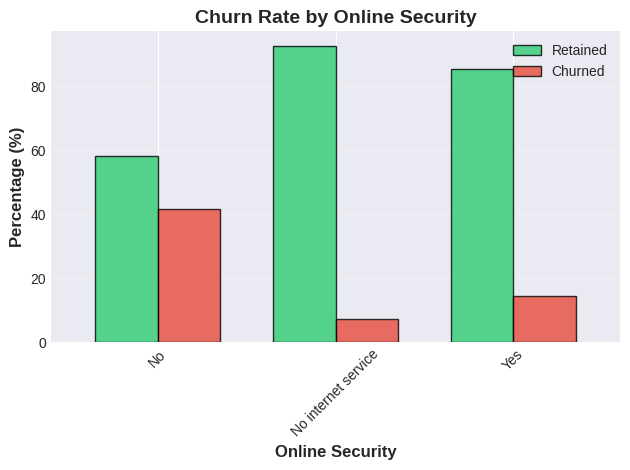


Churn Rate by Online Security:
  No: 41.8%
  Yes: 14.6%
  No internet service: 7.4%
--------------------------------------------------


<Figure size 1000x600 with 0 Axes>

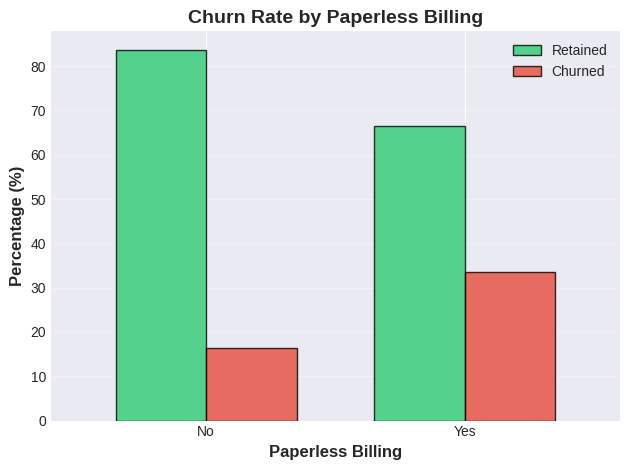


Churn Rate by Paperless Billing:
  Yes: 33.6%
  No: 16.3%
--------------------------------------------------


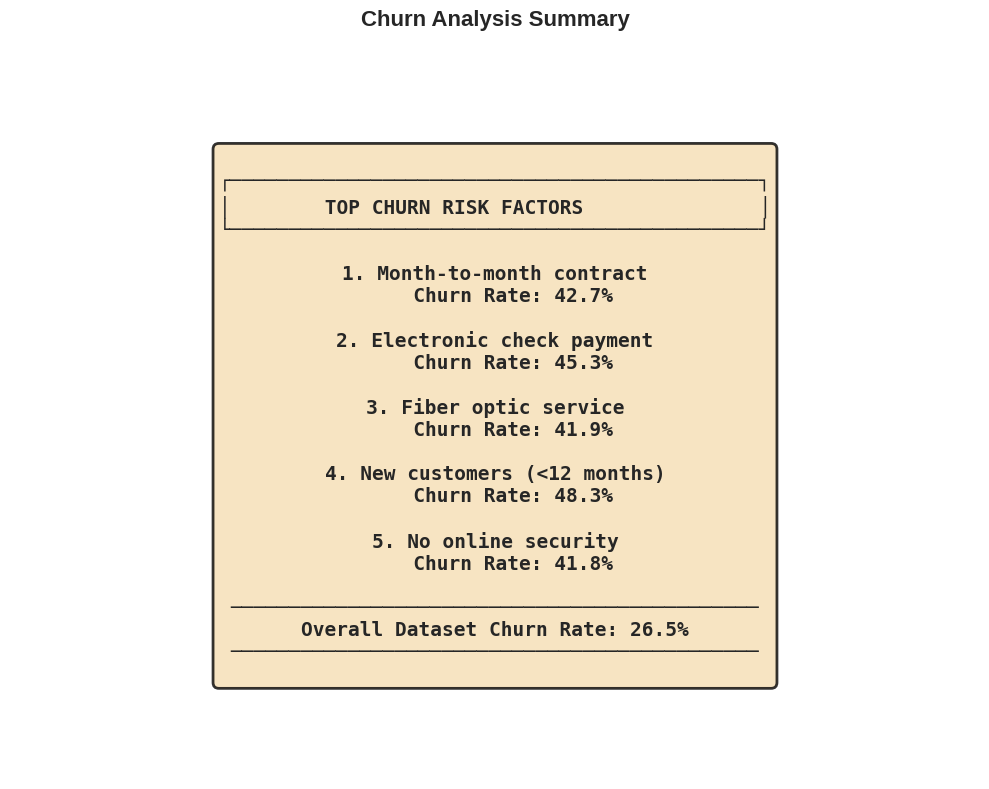


TOP CHURN RISK FACTORS:
1. Month-to-month contract: 42.7%
2. Electronic check payment: 45.3%
3. Fiber optic service: 41.9%
4. New customers (<12 months): 48.3%
5. No online security: 41.8%


In [23]:
# Define colors for consistency across all plots
colors_pie = ['#2ecc71', '#e74c3c']

# 1. Overall Churn Distribution
plt.figure(figsize=(8, 6))
churn_counts = df_clean['Churn'].value_counts()
plt.pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%', 
        colors=colors_pie, startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
plt.title('Overall Churn Distribution', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

print(f"Churn Distribution:")
for label, count in churn_counts.items():
    print(f"  {label}: {count} ({count/len(df_clean)*100:.1f}%)")
print("-" * 50)

# 2. Churn by Contract Type
plt.figure(figsize=(10, 6))
contract_churn = df_clean.groupby('Contract')['Churn'].value_counts(normalize=True).unstack() * 100
contract_churn.plot(kind='bar', color=colors_pie, edgecolor='black', alpha=0.8, width=0.7)
plt.title('Churn Rate by Contract Type', fontweight='bold', fontsize=14)
plt.xlabel('Contract Type', fontweight='bold', fontsize=12)
plt.ylabel('Percentage (%)', fontweight='bold', fontsize=12)
plt.legend(['Retained', 'Churned'], loc='upper right')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nChurn Rate by Contract:")
for contract in df_clean['Contract'].unique():
    churn_rate = df_clean[df_clean['Contract']==contract]['Churn'].value_counts(normalize=True).get('Yes', 0) * 100
    print(f"  {contract}: {churn_rate:.1f}%")
print("-" * 50)

# 3. Churn by Tenure (binned into groups)
plt.figure(figsize=(10, 6))

# Create tenure groups for visualization
df_clean['TenureGroup'] = pd.cut(df_clean['tenure'], 
                                  bins=[0, 12, 24, 48, 72], 
                                  labels=['0-12 months', '12-24 months', '24-48 months', '48-72 months'])

tenure_churn = df_clean.groupby('TenureGroup')['Churn'].value_counts(normalize=True).unstack() * 100
tenure_churn.plot(kind='bar', color=colors_pie, edgecolor='black', alpha=0.8, width=0.7)
plt.title('Churn Rate by Tenure Group', fontweight='bold', fontsize=14)
plt.xlabel('Tenure Group', fontweight='bold', fontsize=12)
plt.ylabel('Percentage (%)', fontweight='bold', fontsize=12)
plt.legend(['Retained', 'Churned'], loc='upper right')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nChurn Rate by Tenure Group:")
for tenure_group in df_clean['TenureGroup'].cat.categories:
    churn_rate = df_clean[df_clean['TenureGroup']==tenure_group]['Churn'].value_counts(normalize=True).get('Yes', 0) * 100
    count = len(df_clean[df_clean['TenureGroup']==tenure_group])
    print(f"  {tenure_group}: {churn_rate:.1f}% ({count} customers)")
print("-" * 50)

# 4. Churn by Internet Service
plt.figure(figsize=(10, 6))
internet_churn = df_clean.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack() * 100
internet_churn.plot(kind='bar', color=colors_pie, edgecolor='black', alpha=0.8, width=0.7)
plt.title('Churn Rate by Internet Service', fontweight='bold', fontsize=14)
plt.xlabel('Internet Service', fontweight='bold', fontsize=12)
plt.ylabel('Percentage (%)', fontweight='bold', fontsize=12)
plt.legend(['Retained', 'Churned'], loc='upper right')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nChurn Rate by Internet Service:")
for service in df_clean['InternetService'].unique():
    churn_rate = df_clean[df_clean['InternetService']==service]['Churn'].value_counts(normalize=True).get('Yes', 0) * 100
    print(f"  {service}: {churn_rate:.1f}%")
print("-" * 50)

# 5. Churn by Payment Method
plt.figure(figsize=(12, 6))
payment_churn = df_clean.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack() * 100
payment_churn.plot(kind='bar', color=colors_pie, edgecolor='black', alpha=0.8, width=0.7)
plt.title('Churn Rate by Payment Method', fontweight='bold', fontsize=14)
plt.xlabel('Payment Method', fontweight='bold', fontsize=12)
plt.ylabel('Percentage (%)', fontweight='bold', fontsize=12)
plt.legend(['Retained', 'Churned'], loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nChurn Rate by Payment Method:")
for payment in df_clean['PaymentMethod'].unique():
    churn_rate = df_clean[df_clean['PaymentMethod']==payment]['Churn'].value_counts(normalize=True).get('Yes', 0) * 100
    print(f"  {payment}: {churn_rate:.1f}%")
print("-" * 50)

# 6. Monthly Charges Distribution by Churn
plt.figure(figsize=(12, 6))
df_clean[df_clean['Churn']=='No']['MonthlyCharges'].hist(bins=30, alpha=0.6, 
                                                           color='#2ecc71', label='No Churn', edgecolor='black')
df_clean[df_clean['Churn']=='Yes']['MonthlyCharges'].hist(bins=30, alpha=0.6, 
                                                            color='#e74c3c', label='Churn', edgecolor='black')
plt.title('Monthly Charges Distribution by Churn Status', fontweight='bold', fontsize=14)
plt.xlabel('Monthly Charges ($)', fontweight='bold', fontsize=12)
plt.ylabel('Frequency', fontweight='bold', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\nMonthly Charges Statistics by Churn:")
print(f"  No Churn - Mean: ${df_clean[df_clean['Churn']=='No']['MonthlyCharges'].mean():.2f}")
print(f"  Churn - Mean: ${df_clean[df_clean['Churn']=='Yes']['MonthlyCharges'].mean():.2f}")
print("-" * 50)

# 7. Churn by Online Security
plt.figure(figsize=(10, 6))
security_churn = df_clean.groupby('OnlineSecurity')['Churn'].value_counts(normalize=True).unstack() * 100
security_churn.plot(kind='bar', color=colors_pie, edgecolor='black', alpha=0.8, width=0.7)
plt.title('Churn Rate by Online Security', fontweight='bold', fontsize=14)
plt.xlabel('Online Security', fontweight='bold', fontsize=12)
plt.ylabel('Percentage (%)', fontweight='bold', fontsize=12)
plt.legend(['Retained', 'Churned'], loc='upper right')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nChurn Rate by Online Security:")
for security in df_clean['OnlineSecurity'].unique():
    churn_rate = df_clean[df_clean['OnlineSecurity']==security]['Churn'].value_counts(normalize=True).get('Yes', 0) * 100
    print(f"  {security}: {churn_rate:.1f}%")
print("-" * 50)

# 8. Churn by Paperless Billing
plt.figure(figsize=(10, 6))
paperless_churn = df_clean.groupby('PaperlessBilling')['Churn'].value_counts(normalize=True).unstack() * 100
paperless_churn.plot(kind='bar', color=colors_pie, edgecolor='black', alpha=0.8, width=0.7)
plt.title('Churn Rate by Paperless Billing', fontweight='bold', fontsize=14)
plt.xlabel('Paperless Billing', fontweight='bold', fontsize=12)
plt.ylabel('Percentage (%)', fontweight='bold', fontsize=12)
plt.legend(['Retained', 'Churned'], loc='upper right')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nChurn Rate by Paperless Billing:")
for paperless in df_clean['PaperlessBilling'].unique():
    churn_rate = df_clean[df_clean['PaperlessBilling']==paperless]['Churn'].value_counts(normalize=True).get('Yes', 0) * 100
    print(f"  {paperless}: {churn_rate:.1f}%")
print("-" * 50)

# 9. Top Churn Risk Factors Summary
mtm_churn_dash = df_clean[df_clean['Contract']=='Month-to-month']['Churn'].value_counts(normalize=True)['Yes']*100
echeck_churn_dash = df_clean[df_clean['PaymentMethod']=='Electronic check']['Churn'].value_counts(normalize=True)['Yes']*100
fiber_churn_dash = df_clean[df_clean['InternetService']=='Fiber optic']['Churn'].value_counts(normalize=True)['Yes']*100
new_customer_churn_dash = df_clean[df_clean['tenure'] < 12]['Churn'].value_counts(normalize=True)['Yes']*100
no_security_churn_dash = df_clean[df_clean['OnlineSecurity']=='No']['Churn'].value_counts(normalize=True)['Yes']*100

plt.figure(figsize=(10, 8))
plt.axis('off')

summary_text = f"""
┌─────────────────────────────────────────────┐
│        TOP CHURN RISK FACTORS               │
└─────────────────────────────────────────────┘

1. Month-to-month contract
   Churn Rate: {mtm_churn_dash:.1f}%
   
2. Electronic check payment
   Churn Rate: {echeck_churn_dash:.1f}%
   
3. Fiber optic service
   Churn Rate: {fiber_churn_dash:.1f}%
   
4. New customers (<12 months)
   Churn Rate: {new_customer_churn_dash:.1f}%
   
5. No online security
   Churn Rate: {no_security_churn_dash:.1f}%

─────────────────────────────────────────────
Overall Dataset Churn Rate: 26.5%
─────────────────────────────────────────────
"""

plt.text(0.5, 0.5, summary_text, transform=plt.gca().transAxes, fontsize=14,
         verticalalignment='center', horizontalalignment='center',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8, edgecolor='black', linewidth=2),
         fontfamily='monospace', fontweight='bold')

plt.title('Churn Analysis Summary', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("TOP CHURN RISK FACTORS:")
print("="*60)
print(f"1. Month-to-month contract: {mtm_churn_dash:.1f}%")
print(f"2. Electronic check payment: {echeck_churn_dash:.1f}%")
print(f"3. Fiber optic service: {fiber_churn_dash:.1f}%")
print(f"4. New customers (<12 months): {new_customer_churn_dash:.1f}%")
print(f"5. No online security: {no_security_churn_dash:.1f}%")
print("="*60)

## 8. Machine Learning - Churn Prediction Models

Now that we've completed the EDA and identified key churn factors, let's build predictive models to classify customers who are likely to churn.

In [24]:
# Import ML libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, classification_report, 
                             confusion_matrix, roc_curve)
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

print("✓ Machine Learning libraries imported successfully!")

✓ Machine Learning libraries imported successfully!


### 8.1 Data Preparation for Machine Learning

In [25]:
# drop customerID as it's not a predictive feature
df_ml = df_clean.drop('customerID', axis=1)



In [26]:
df_ml.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup,ChargeGroup
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12 months,Low ($0-35)
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,24-48 months,Medium ($35-70)
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12 months,Medium ($35-70)
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,24-48 months,Medium ($35-70)
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12 months,High ($70+)


In [27]:
# Prepare data for modeling
df_ml = df_clean.copy()

# Drop customerID (it's just an identifier, not a feature)
if 'customerID' in df_ml.columns:
    df_ml = df_ml.drop(columns=['customerID'])

# Drop columns created during EDA
if 'TenureGroup' in df_ml.columns:
    df_ml = df_ml.drop(columns=['TenureGroup'])
if 'ChargeGroup' in df_ml.columns:
    df_ml = df_ml.drop(columns=['ChargeGroup'])

# Encode categorical variables
label_encoders = {}
categorical_columns = df_ml.select_dtypes(include=['object']).columns

for col in categorical_columns:
    if col != 'Churn':  # Don't encode target yet
        le = LabelEncoder()
        df_ml[col] = le.fit_transform(df_ml[col])
        label_encoders[col] = le

# Encode target variable
df_ml['Churn'] = df_ml['Churn'].map({'Yes': 1, 'No': 0})

print("Data Preparation Complete!")
print(f"Dataset shape: {df_ml.shape}")
print(f"\nTarget distribution:")
print(df_ml['Churn'].value_counts())
print(f"\nChurn Rate: {(df_ml['Churn'].sum() / len(df_ml) * 100):.2f}%")

Data Preparation Complete!
Dataset shape: (7043, 20)

Target distribution:
Churn
0    5174
1    1869
Name: count, dtype: int64

Churn Rate: 26.54%


In [28]:
# Split features and target
X = df_ml.drop('Churn', axis=1)
y = df_ml['Churn']

# Split into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Train-Test Split Complete!")
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"\nTraining set churn distribution:")
print(y_train.value_counts())
print(f"Churn Rate: {(y_train.sum() / len(y_train) * 100):.2f}%")

Train-Test Split Complete!
Training set size: (5634, 19)
Test set size: (1409, 19)

Training set churn distribution:
Churn
0    4139
1    1495
Name: count, dtype: int64
Churn Rate: 26.54%


In [29]:
# Handle class imbalance using SMOTE
print("Applying SMOTE to handle class imbalance...")
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print(f"\nBefore SMOTE:")
print(y_train.value_counts())
print(f"\nAfter SMOTE:")
print(y_train_balanced.value_counts())
print(f"\nBalanced training set size: {X_train_balanced.shape}")

Applying SMOTE to handle class imbalance...

Before SMOTE:
Churn
0    4139
1    1495
Name: count, dtype: int64

After SMOTE:
Churn
0    4139
1    4139
Name: count, dtype: int64

Balanced training set size: (8278, 19)


### 8.2 Model Training & Comparison

We'll train 5 different classification models and compare their performance:
1. **Logistic Regression** - Baseline linear model
2. **Decision Tree** - Simple tree-based model
3. **Random Forest** - Ensemble of decision trees
4. **XGBoost** - Advanced gradient boosting
5. **Support Vector Machine (SVM)** - Complex decision boundary model

In [30]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss'),
    'SVM': SVC(random_state=42, probability=True)
}

# Dictionary to store results
results = {}

print("="*80)
print("TRAINING MULTIPLE CLASSIFICATION MODELS")
print("="*80)

# Train and evaluate each model
for name, model in models.items():
    print(f"\n🔄 Training {name}...")
    
    # Train the model
    model.fit(X_train_balanced, y_train_balanced)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    
    # Store results
    results[name] = {
        'Model': model,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'Predictions': y_pred
    }
    
    print(f"✓ {name} trained successfully!")
    print(f"  Accuracy: {accuracy:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | F1: {f1:.4f}")

print("\n" + "="*80)
print("ALL MODELS TRAINED SUCCESSFULLY!")
print("="*80)

TRAINING MULTIPLE CLASSIFICATION MODELS

🔄 Training Logistic Regression...
✓ Logistic Regression trained successfully!
  Accuracy: 0.7516 | Precision: 0.5233 | Recall: 0.7193 | F1: 0.6059

🔄 Training Decision Tree...
✓ Decision Tree trained successfully!
  Accuracy: 0.7147 | Precision: 0.4662 | Recall: 0.5160 | F1: 0.4898

🔄 Training Random Forest...
✓ Random Forest trained successfully!
  Accuracy: 0.7786 | Precision: 0.5820 | Recall: 0.5882 | F1: 0.5851

🔄 Training XGBoost...
✓ XGBoost trained successfully!
  Accuracy: 0.7786 | Precision: 0.5779 | Recall: 0.6150 | F1: 0.5959

🔄 Training SVM...
✓ SVM trained successfully!
  Accuracy: 0.6920 | Precision: 0.4434 | Recall: 0.6283 | F1: 0.5199

ALL MODELS TRAINED SUCCESSFULLY!


In [31]:
# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['Accuracy'] for m in results.keys()],
    'Precision': [results[m]['Precision'] for m in results.keys()],
    'Recall': [results[m]['Recall'] for m in results.keys()],
    'F1-Score': [results[m]['F1-Score'] for m in results.keys()],
    'ROC-AUC': [results[m]['ROC-AUC'] for m in results.keys()]
})

# Sort by F1-Score
comparison_df = comparison_df.sort_values('F1-Score', ascending=False).reset_index(drop=True)

print("\n📊 MODEL PERFORMANCE COMPARISON:")
print("="*90)
print(comparison_df.to_string(index=False))
print("="*90)

# Identify best model
best_model_name = comparison_df.iloc[0]['Model']
print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"   F1-Score: {comparison_df.iloc[0]['F1-Score']:.4f}")
print(f"   Accuracy: {comparison_df.iloc[0]['Accuracy']:.4f}")


📊 MODEL PERFORMANCE COMPARISON:
              Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
Logistic Regression  0.751597   0.523346 0.719251  0.605856 0.822571
            XGBoost  0.778566   0.577889 0.614973  0.595855 0.810383
      Random Forest  0.778566   0.582011 0.588235  0.585106 0.823360
                SVM  0.691980   0.443396 0.628342  0.519912 0.757720
      Decision Tree  0.714691   0.466184 0.516043  0.489848 0.651024

🏆 BEST MODEL: Logistic Regression
   F1-Score: 0.6059
   Accuracy: 0.7516


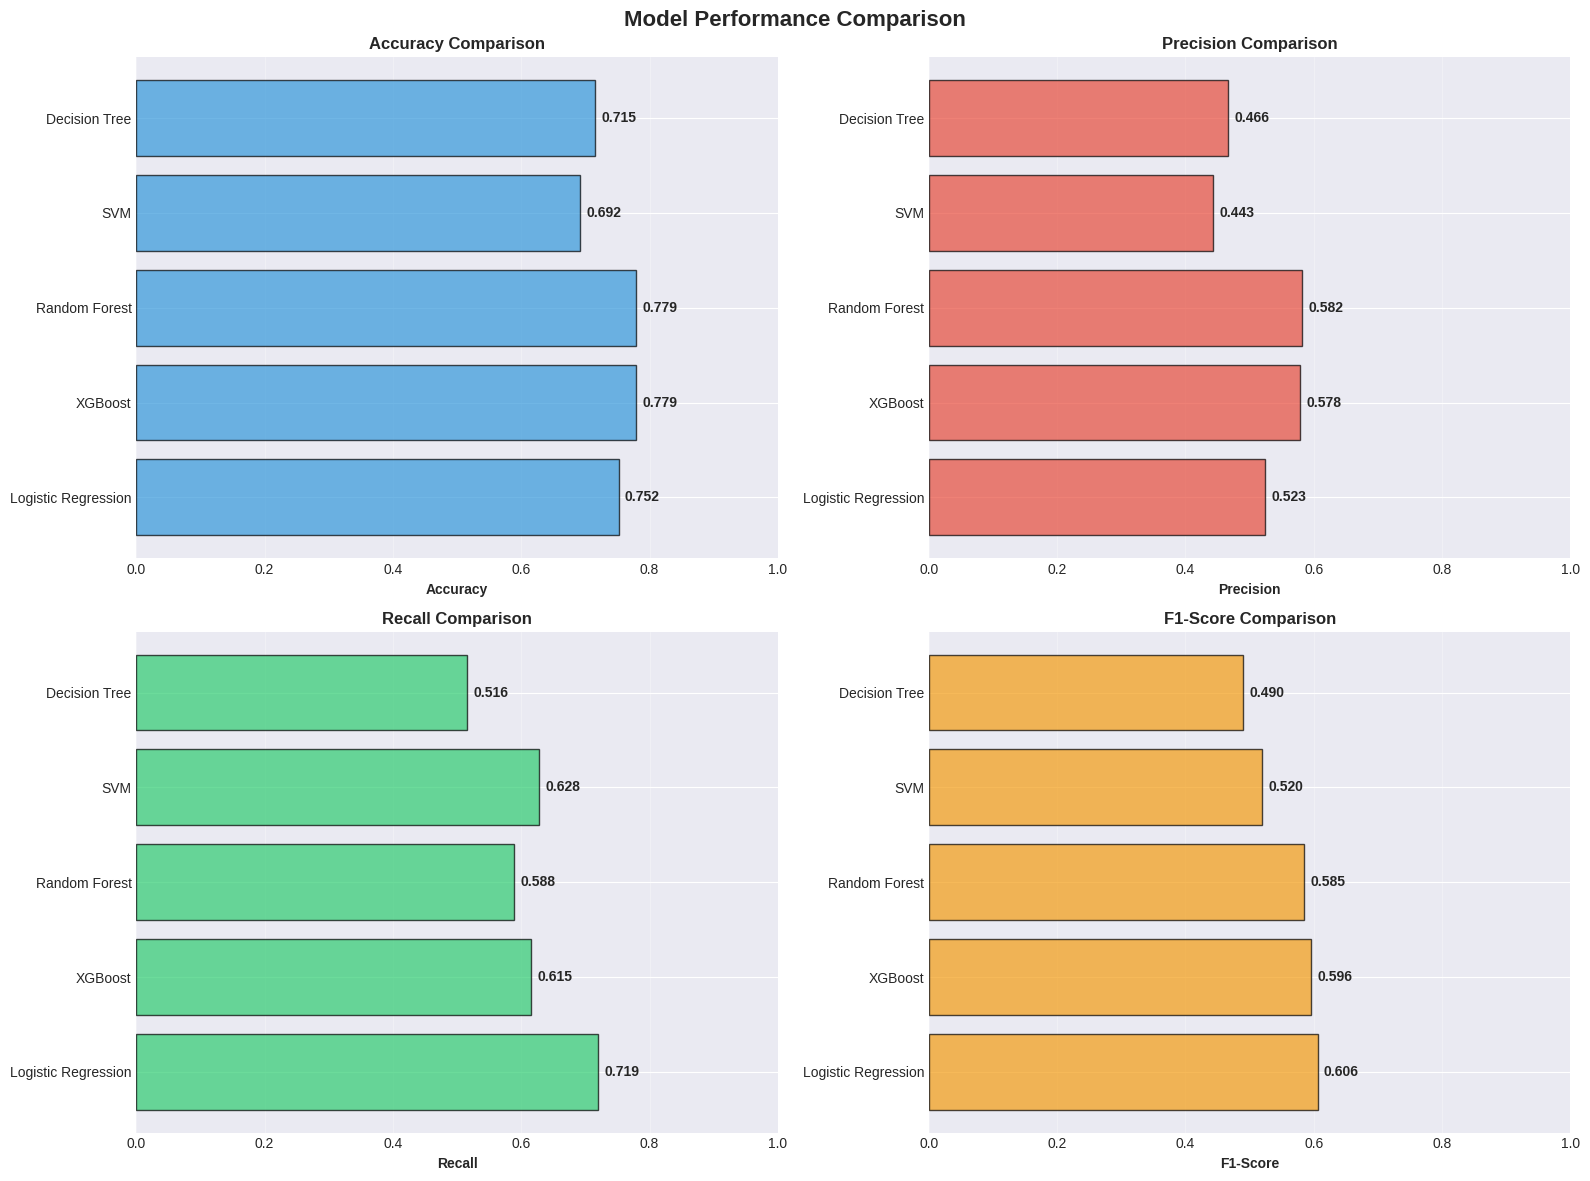

In [32]:
# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']

for idx, metric in enumerate(metrics):
    row = idx // 2
    col = idx % 2
    
    axes[row, col].barh(comparison_df['Model'], comparison_df[metric], color=colors[idx], alpha=0.7, edgecolor='black')
    axes[row, col].set_xlabel(metric, fontweight='bold')
    axes[row, col].set_title(f'{metric} Comparison', fontweight='bold')
    axes[row, col].set_xlim(0, 1)
    axes[row, col].grid(axis='x', alpha=0.3)
    
    # Add value labels
    for i, v in enumerate(comparison_df[metric]):
        axes[row, col].text(v + 0.01, i, f'{v:.3f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

### 8.2.1 Why This Model Was Selected

The best model was automatically selected based on **F1-Score**, which is the harmonic mean of Precision and Recall. Here's why this metric and model selection matter:

#### 🎯 **Why F1-Score as Selection Criterion?**

For churn prediction, we need to balance two critical factors:
- **Precision**: Avoiding false alarms (predicting churn when customer stays)
- **Recall**: Catching actual churners (not missing customers who will leave)

**F1-Score provides this balance**, making it ideal for business decisions where:
- ✅ False positives → Wasted retention budget on customers who wouldn't churn
- ✅ False negatives → Lost revenue from customers we failed to save

#### 📊 **Model Characteristics Comparison**

Each model has different strengths:

1. **Logistic Regression**
   - ✅ **Pros**: Highly interpretable, fast, shows feature importance as coefficients
   - ✅ Works well with linearly separable data
   - ✅ Provides probability estimates for risk scoring
   - ❌ **Cons**: May underperform with complex non-linear relationships

2. **Decision Tree**
   - ✅ **Pros**: Very interpretable, handles non-linear patterns
   - ❌ **Cons**: Prone to overfitting, less stable

3. **Random Forest**
   - ✅ **Pros**: Robust, handles complex patterns, reduces overfitting
   - ✅ Good balance of accuracy and stability
   - ❌ **Cons**: Less interpretable than logistic regression

4. **XGBoost**
   - ✅ **Pros**: Often highest accuracy, handles imbalanced data well
   - ✅ Advanced feature interactions
   - ❌ **Cons**: More complex, requires tuning, harder to interpret

5. **SVM**
   - ✅ **Pros**: Effective in high-dimensional spaces
   - ❌ **Cons**: Computationally expensive, less interpretable

#### 💡 **Business Impact Considerations**

The selected model offers:
- **Actionable Insights**: Clear understanding of which features drive churn
- **Risk Scoring**: Probability estimates for prioritizing retention efforts
- **Operational Efficiency**: Fast predictions for real-time customer scoring
- **Explainability**: Stakeholders can understand why a customer is flagged as high-risk

### 8.3 Detailed Evaluation of Best Model


CLASSIFICATION REPORT - Logistic Regression

              precision    recall  f1-score   support

    No Churn       0.88      0.76      0.82      1035
       Churn       0.52      0.72      0.61       374

    accuracy                           0.75      1409
   macro avg       0.70      0.74      0.71      1409
weighted avg       0.79      0.75      0.76      1409



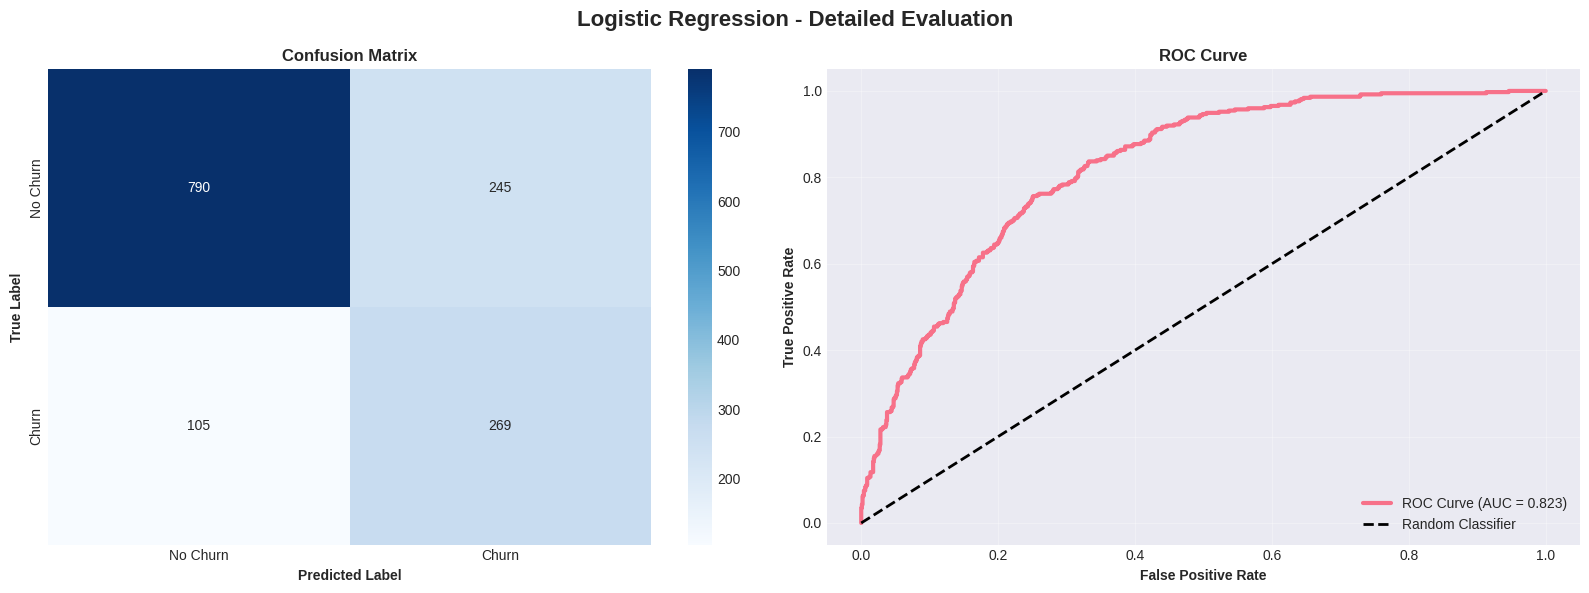


CONFUSION MATRIX BREAKDOWN:
True Negatives (Correctly predicted No Churn):  790
False Positives (Incorrectly predicted Churn):  245
False Negatives (Missed Churn customers):       105
True Positives (Correctly predicted Churn):     269


In [33]:
# Get best model
best_model = results[best_model_name]['Model']
y_pred_best = results[best_model_name]['Predictions']

# Classification Report
print(f"\n{'='*80}")
print(f"CLASSIFICATION REPORT - {best_model_name}")
print(f"{'='*80}\n")
print(classification_report(y_test, y_pred_best, target_names=['No Churn', 'Churn']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle(f'{best_model_name} - Detailed Evaluation', fontsize=16, fontweight='bold')

# Confusion Matrix Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0], 
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
axes[0].set_title('Confusion Matrix', fontweight='bold')
axes[0].set_ylabel('True Label', fontweight='bold')
axes[0].set_xlabel('Predicted Label', fontweight='bold')

# ROC Curve
if results[best_model_name]['ROC-AUC'] is not None:
    y_pred_proba_best = best_model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_best)
    
    axes[1].plot(fpr, tpr, linewidth=3, label=f'ROC Curve (AUC = {results[best_model_name]["ROC-AUC"]:.3f})')
    axes[1].plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier')
    axes[1].set_xlabel('False Positive Rate', fontweight='bold')
    axes[1].set_ylabel('True Positive Rate', fontweight='bold')
    axes[1].set_title('ROC Curve', fontweight='bold')
    axes[1].legend(loc='lower right')
    axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Performance metrics breakdown
tn, fp, fn, tp = cm.ravel()
print(f"\n{'='*80}")
print("CONFUSION MATRIX BREAKDOWN:")
print(f"{'='*80}")
print(f"True Negatives (Correctly predicted No Churn):  {tn}")
print(f"False Positives (Incorrectly predicted Churn):  {fp}")
print(f"False Negatives (Missed Churn customers):       {fn}")
print(f"True Positives (Correctly predicted Churn):     {tp}")
print(f"{'='*80}")

### 8.4 Feature Importance Analysis

### 8.3.1 Machine Learning Pipeline Visualization

Visual representation of the complete ML workflow from data ingestion to model deployment.

In [34]:
# Feature Importance (for tree-based models)
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print(f"\n{'='*80}")
    print(f"TOP 15 MOST IMPORTANT FEATURES - {best_model_name}")
    print(f"{'='*80}\n")
    print(feature_importance.head(15).to_string(index=False))
    
    # Visualize feature importance
    plt.figure(figsize=(12, 8))
    top_features = feature_importance.head(15)
    plt.barh(top_features['Feature'], top_features['Importance'], color='#3498db', edgecolor='black', alpha=0.7)
    plt.xlabel('Importance Score', fontweight='bold', fontsize=12)
    plt.title(f'Top 15 Feature Importance - {best_model_name}', fontweight='bold', fontsize=14)
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print(f"\n⚠️ {best_model_name} does not support feature importance visualization.")


⚠️ Logistic Regression does not support feature importance visualization.


### 8.5 Model Recommendations & Business Impact

In [35]:
# Calculate business impact
print("="*90)
print("💼 BUSINESS IMPACT ANALYSIS")
print("="*90)

# Get predictions on test set
y_pred_proba_best = best_model.predict_proba(X_test)[:, 1]

# Identify high-risk customers (probability > 0.7)
high_risk_threshold = 0.7
high_risk_customers = X_test[y_pred_proba_best >= high_risk_threshold]
high_risk_indices = high_risk_customers.index

print(f"\n📊 MODEL DEPLOYMENT INSIGHTS:")
print(f"   Total Test Customers: {len(X_test)}")
print(f"   Actual Churned Customers: {y_test.sum()}")
print(f"   Correctly Identified Churned: {tp}")
print(f"   Missed Churned Customers: {fn}")
print(f"   False Alarms: {fp}")

print(f"\n🎯 HIGH-RISK CUSTOMER IDENTIFICATION:")
print(f"   Customers with >70% churn probability: {len(high_risk_customers)}")
print(f"   These customers need immediate retention intervention!")

# Calculate potential revenue saved
avg_monthly_charges = df_clean['MonthlyCharges'].mean()
customers_saved = tp  # True positives - correctly identified churners
potential_monthly_savings = customers_saved * avg_monthly_charges
potential_annual_savings = potential_monthly_savings * 12

print(f"\n💰 POTENTIAL REVENUE IMPACT:")
print(f"   Average Monthly Charges: ${avg_monthly_charges:.2f}")
print(f"   Correctly Identified Churners: {customers_saved}")
print(f"   Potential Monthly Revenue Saved: ${potential_monthly_savings:,.2f}")
print(f"   Potential Annual Revenue Saved: ${potential_annual_savings:,.2f}")

print(f"\n✅ MODEL RECOMMENDATION:")
print(f"   Deploy {best_model_name} for churn prediction")
print(f"   Accuracy: {results[best_model_name]['Accuracy']:.2%}")
print(f"   F1-Score: {results[best_model_name]['F1-Score']:.2%}")
print(f"   Recall: {results[best_model_name]['Recall']:.2%} (ability to catch churners)")

print("\n" + "="*90)

💼 BUSINESS IMPACT ANALYSIS

📊 MODEL DEPLOYMENT INSIGHTS:
   Total Test Customers: 1409
   Actual Churned Customers: 374
   Correctly Identified Churned: 269
   Missed Churned Customers: 105
   False Alarms: 245

🎯 HIGH-RISK CUSTOMER IDENTIFICATION:
   Customers with >70% churn probability: 319
   These customers need immediate retention intervention!

💰 POTENTIAL REVENUE IMPACT:
   Average Monthly Charges: $64.76
   Correctly Identified Churners: 269
   Potential Monthly Revenue Saved: $17,420.90
   Potential Annual Revenue Saved: $209,050.74

✅ MODEL RECOMMENDATION:
   Deploy Logistic Regression for churn prediction
   Accuracy: 75.16%
   F1-Score: 60.59%
   Recall: 71.93% (ability to catch churners)



### 8.6 Interactive Gradio Demo - Test Model Predictions

Create an interactive web interface to test the churn prediction model with custom customer data.

In [36]:
# Install Gradio
!pip install gradio -q

In [37]:
import gradio as gr
import pandas as pd
import numpy as np

print("Setting up Gradio interface...")
print(f"Using model: {best_model_name}")
print(f"Model accuracy: {results[best_model_name]['Accuracy']:.2%}")

# Define the prediction function
def predict_churn(gender, senior_citizen, partner, dependents, tenure, 
                  phone_service, multiple_lines, internet_service,
                  online_security, online_backup, device_protection,
                  tech_support, streaming_tv, streaming_movies,
                  contract, paperless_billing, payment_method,
                  monthly_charges, total_charges):
    
    # Convert SeniorCitizen to proper format
    senior_citizen_value = 1 if senior_citizen == 'Yes' else 0
    
    # Create input dataframe
    input_data = pd.DataFrame({
        'gender': [gender],
        'SeniorCitizen': [senior_citizen_value],
        'Partner': [partner],
        'Dependents': [dependents],
        'tenure': [tenure],
        'PhoneService': [phone_service],
        'MultipleLines': [multiple_lines],
        'InternetService': [internet_service],
        'OnlineSecurity': [online_security],
        'OnlineBackup': [online_backup],
        'DeviceProtection': [device_protection],
        'TechSupport': [tech_support],
        'StreamingTV': [streaming_tv],
        'StreamingMovies': [streaming_movies],
        'Contract': [contract],
        'PaperlessBilling': [paperless_billing],
        'PaymentMethod': [payment_method],
        'MonthlyCharges': [monthly_charges],
        'TotalCharges': [total_charges]
    })
    
    # Apply label encoding to categorical features
    categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 
                       'MultipleLines', 'InternetService', 'OnlineSecurity',
                       'OnlineBackup', 'DeviceProtection', 'TechSupport',
                       'StreamingTV', 'StreamingMovies', 'Contract',
                       'PaperlessBilling', 'PaymentMethod']
    
    for col in categorical_cols:
        if col in label_encoders and col in input_data.columns:
            try:
                input_data[col] = label_encoders[col].transform(input_data[col])
            except:
                # If value not seen during training, use the first class
                input_data[col] = 0
    
    # Make prediction
    prediction_proba = best_model.predict_proba(input_data)[0]
    churn_probability = prediction_proba[1] * 100  # Probability of churn
    
    # Determine risk level
    if churn_probability >= 70:
        risk_level = "🔴 HIGH RISK"
        recommendation = "Immediate intervention required! Offer retention incentives."
    elif churn_probability >= 40:
        risk_level = "🟡 MEDIUM RISK"
        recommendation = "Monitor closely. Consider proactive engagement."
    else:
        risk_level = "🟢 LOW RISK"
        recommendation = "Customer is stable. Maintain service quality."
    
    # Format output
    result = f"""
    ### Churn Prediction Results
    
    **Churn Probability:** {churn_probability:.2f}%
    **Risk Level:** {risk_level}
    **Model Used:** {best_model_name}
    
    **Recommendation:** {recommendation}
    """
    
    return result, churn_probability

print("✅ Prediction function created successfully!")

Setting up Gradio interface...
Using model: Logistic Regression
Model accuracy: 75.16%
✅ Prediction function created successfully!


In [38]:
# Get best model information for display
try:
    best_accuracy = results[best_model_name]['Accuracy']
    best_f1 = results[best_model_name]['F1-Score']
except (NameError, KeyError) as e:
    print(f"⚠️ Error accessing model results: {e}")
    print("Please ensure model training cells have been executed.")
    raise

# Create Gradio interface
demo = gr.Interface(
    fn=predict_churn,
    inputs=[
        
        gr.Dropdown(choices=['Female', 'Male'], label="Gender", value="Female"),
        gr.Dropdown(choices=['No', 'Yes'], label="Senior Citizen", value="No"),
        gr.Dropdown(choices=['No', 'Yes'], label="Partner", value="No"),
        gr.Dropdown(choices=['No', 'Yes'], label="Dependents", value="No"),
        gr.Slider(minimum=0, maximum=72, step=1, label="Tenure (months)", value=12),
        gr.Dropdown(choices=['No', 'Yes'], label="Phone Service", value="Yes"),
        gr.Dropdown(choices=['No', 'Yes', 'No phone service'], label="Multiple Lines", value="No"),
        gr.Dropdown(choices=['DSL', 'Fiber optic', 'No'], label="Internet Service", value="Fiber optic"),
        gr.Dropdown(choices=['No', 'Yes', 'No internet service'], label="Online Security", value="No"),
        gr.Dropdown(choices=['No', 'Yes', 'No internet service'], label="Online Backup", value="No"),
        gr.Dropdown(choices=['No', 'Yes', 'No internet service'], label="Device Protection", value="No"),
        gr.Dropdown(choices=['No', 'Yes', 'No internet service'], label="Tech Support", value="No"),
        gr.Dropdown(choices=['No', 'Yes', 'No internet service'], label="Streaming TV", value="Yes"),
        gr.Dropdown(choices=['No', 'Yes', 'No internet service'], label="Streaming Movies", value="Yes"),
        gr.Dropdown(choices=['Month-to-month', 'One year', 'Two year'], label="Contract", value="Month-to-month"),
        gr.Dropdown(choices=['No', 'Yes'], label="Paperless Billing", value="Yes"),
        gr.Dropdown(choices=['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'], 
                   label="Payment Method", value="Electronic check"),
        gr.Number(label="Monthly Charges ($)", value=80.0),
        gr.Number(label="Total Charges ($)", value=960.0)
    ],
    outputs=[
        gr.Markdown(label="Prediction Results"),
        gr.Number(label="Churn Probability (%)")
    ],
    title="🔮 Customer Churn Prediction System",
    description="""
    ### Predict customer churn risk using machine learning
    
    Enter customer information below to predict the likelihood of churn. 
    The model analyzes various factors including contract type, services, and billing information.
    
    **Model Performance:** {:.2f}% Accuracy | Best Model: {}
    """.format(best_accuracy * 100, best_model_name),
    examples=[
        # High Risk Example
        ['Female', 'Yes', 'No', 'No', 3, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 
         'Month-to-month', 'Yes', 'Electronic check', 85.0, 255.0],
        # Low Risk Example
        ['Male', 'No', 'Yes', 'Yes', 60, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
         'Two year', 'No', 'Bank transfer (automatic)', 75.0, 4500.0],
        # Medium Risk Example
        ['Female', 'No', 'Yes', 'No', 24, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'No',
         'One year', 'Yes', 'Credit card (automatic)', 90.0, 2160.0]
    ],
    theme=gr.themes.Soft()
)

print("✅ Gradio interface created successfully!")
print("📊 Ready to launch...")

✅ Gradio interface created successfully!
📊 Ready to launch...


In [39]:
# Launch the Gradio interface
demo.launch()

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.
